# Initial EDA

In [1]:
# Importing packages
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import holidays
from statsmodels.tsa.stattools import adfuller
import warnings
# Suppress all warnings
warnings.simplefilter("ignore")
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import zscore

In [2]:
# Loading data
df = pd.read_csv('initial_data2.csv')

# Converting Date column to Datetime object
df['Date'] = pd.to_datetime(df['Date'])

## Overview of Data
### Quick overview of the dataset

In [3]:
df.head()  # Displaying the first few rows

,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Novavax,Distributed_Unk_Manuf,Dist_Per_100K,...,Dist_Bivalent_PFR,Dist_Bivalent_MOD,Bivalent_Booster_5Plus,Bivalent_Booster_5Plus_Pop_Pct,Bivalent_Booster_12Plus,Bivalent_Booster_12Plus_Pop_Pct,Bivalent_Booster_18Plus,Bivalent_Booster_18Plus_Pop_Pct,Bivalent_Booster_65Plus,Bivalent_Booster_65Plus_Pop_Pct
0,2023-05-10,19,NE,5481710,152400,1647380,2905630,7400.0,0,283379,...,575480.0,193420.0,340508.0,18.9,332054.0,20.5,319161.0,21.9,151146.0,48.4
1,2023-05-10,19,LA,10282120,330500,3807980,5164550,10100.0,0,221178,...,640590.0,328400.0,359506.0,8.3,356199.0,9.1,349934.0,9.8,184844.0,24.9
2,2023-05-10,19,GA,28727475,869100,9763000,14773655,43400.0,0,270569,...,2255000.0,1023320.0,1126791.0,11.3,1103841.0,12.3,1067468.0,13.2,476297.0,31.4
3,2023-05-10,19,WY,1281755,49300,490040,585605,3700.0,0,221466,...,102510.0,50600.0,65920.0,12.1,64919.0,13.2,63244.0,14.2,34832.0,35.1
4,2023-05-10,19,CO,17769135,501900,5402640,9029715,43600.0,0,308560,...,2033760.0,757520.0,1268501.0,23.4,1229981.0,24.9,1176686.0,26.2,462990.0,55.0


In [4]:
df.info()  # Getting information about the columns and their data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38488 entries, 0 to 38487
Columns: 109 entries, Date to Bivalent_Booster_65Plus_Pop_Pct
dtypes: datetime64[ns](1), float64(65), int64(42), object(1)
memory usage: 32.0+ MB


In [5]:
df.describe() # Generating summary statistics for numerical columns

,MMWR_week,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Novavax,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_5Plus,Distributed_Per_100k_12Plus,...,Dist_Bivalent_PFR,Dist_Bivalent_MOD,Bivalent_Booster_5Plus,Bivalent_Booster_5Plus_Pop_Pct,Bivalent_Booster_12Plus,Bivalent_Booster_12Plus_Pop_Pct,Bivalent_Booster_18Plus,Bivalent_Booster_18Plus_Pop_Pct,Bivalent_Booster_65Plus,Bivalent_Booster_65Plus_Pop_Pct
count,38488.000000,3.848800e+04,3.848800e+04,3.848800e+04,3.848800e+04,2.688000e+03,3.848800e+04,38488.000000,38040.000000,38488.000000,...,2.176000e+03,2.176000e+03,1.920000e+03,1920.000000,1.984000e+03,1984.000000,1.984000e+03,1984.000000,1.984000e+03,1984.000000
mean,23.434447,1.543719e+07,6.895489e+05,5.803219e+06,8.695934e+06,3.107299e+04,2.081914e+03,133405.352448,95210.952550,142848.131184,...,2.113963e+06,9.920106e+05,1.479286e+06,13.746927,1.417600e+06,14.496774,1.370507e+06,15.348740,6.277147e+05,32.844506
std,15.406757,6.751604e+07,2.981533e+06,2.533753e+07,3.895544e+07,1.253715e+05,8.327526e+04,81806.329702,114130.534892,109721.029971,...,8.654388e+06,4.074814e+06,5.962144e+06,7.962322,5.751768e+06,8.474525,5.555644e+06,8.825453,2.518317e+06,17.282533
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,3.000000e+02,2.000000e+02,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,10.000000,9.751162e+05,2.350000e+04,2.433700e+05,2.356050e+05,3.200000e+03,0.000000e+00,77371.000000,0.000000,0.000000,...,2.344500e+05,1.012000e+05,1.563768e+05,8.400000,1.484552e+05,8.700000,1.434260e+05,9.375000,6.225700e+04,21.500000
50%,20.000000,3.837018e+06,1.724000e+05,1.501160e+06,2.015325e+06,8.650000e+03,0.000000e+00,137108.000000,0.000000,158702.000000,...,5.532900e+05,2.497000e+05,3.756445e+05,12.900000,3.606550e+05,13.700000,3.516645e+05,14.700000,1.768855e+05,34.200000
75%,36.000000,1.004543e+07,4.578000e+05,3.962520e+06,5.514269e+06,2.262500e+04,0.000000e+00,194971.000000,209005.250000,230425.000000,...,1.591375e+06,7.024500e+05,1.104044e+06,18.800000,1.052240e+06,20.000000,1.015522e+06,21.200000,4.694582e+05,45.700000
max,53.000000,9.844443e+08,3.249690e+07,3.522477e+08,5.864241e+08,1.410700e+06,8.282150e+06,414902.000000,435155.000000,469905.000000,...,9.066158e+07,4.203734e+07,5.635271e+07,35.800000,5.497464e+07,37.400000,5.299631e+07,38.600000,2.369919e+07,71.200000


In [6]:
#...Distribution of continuous variables...#

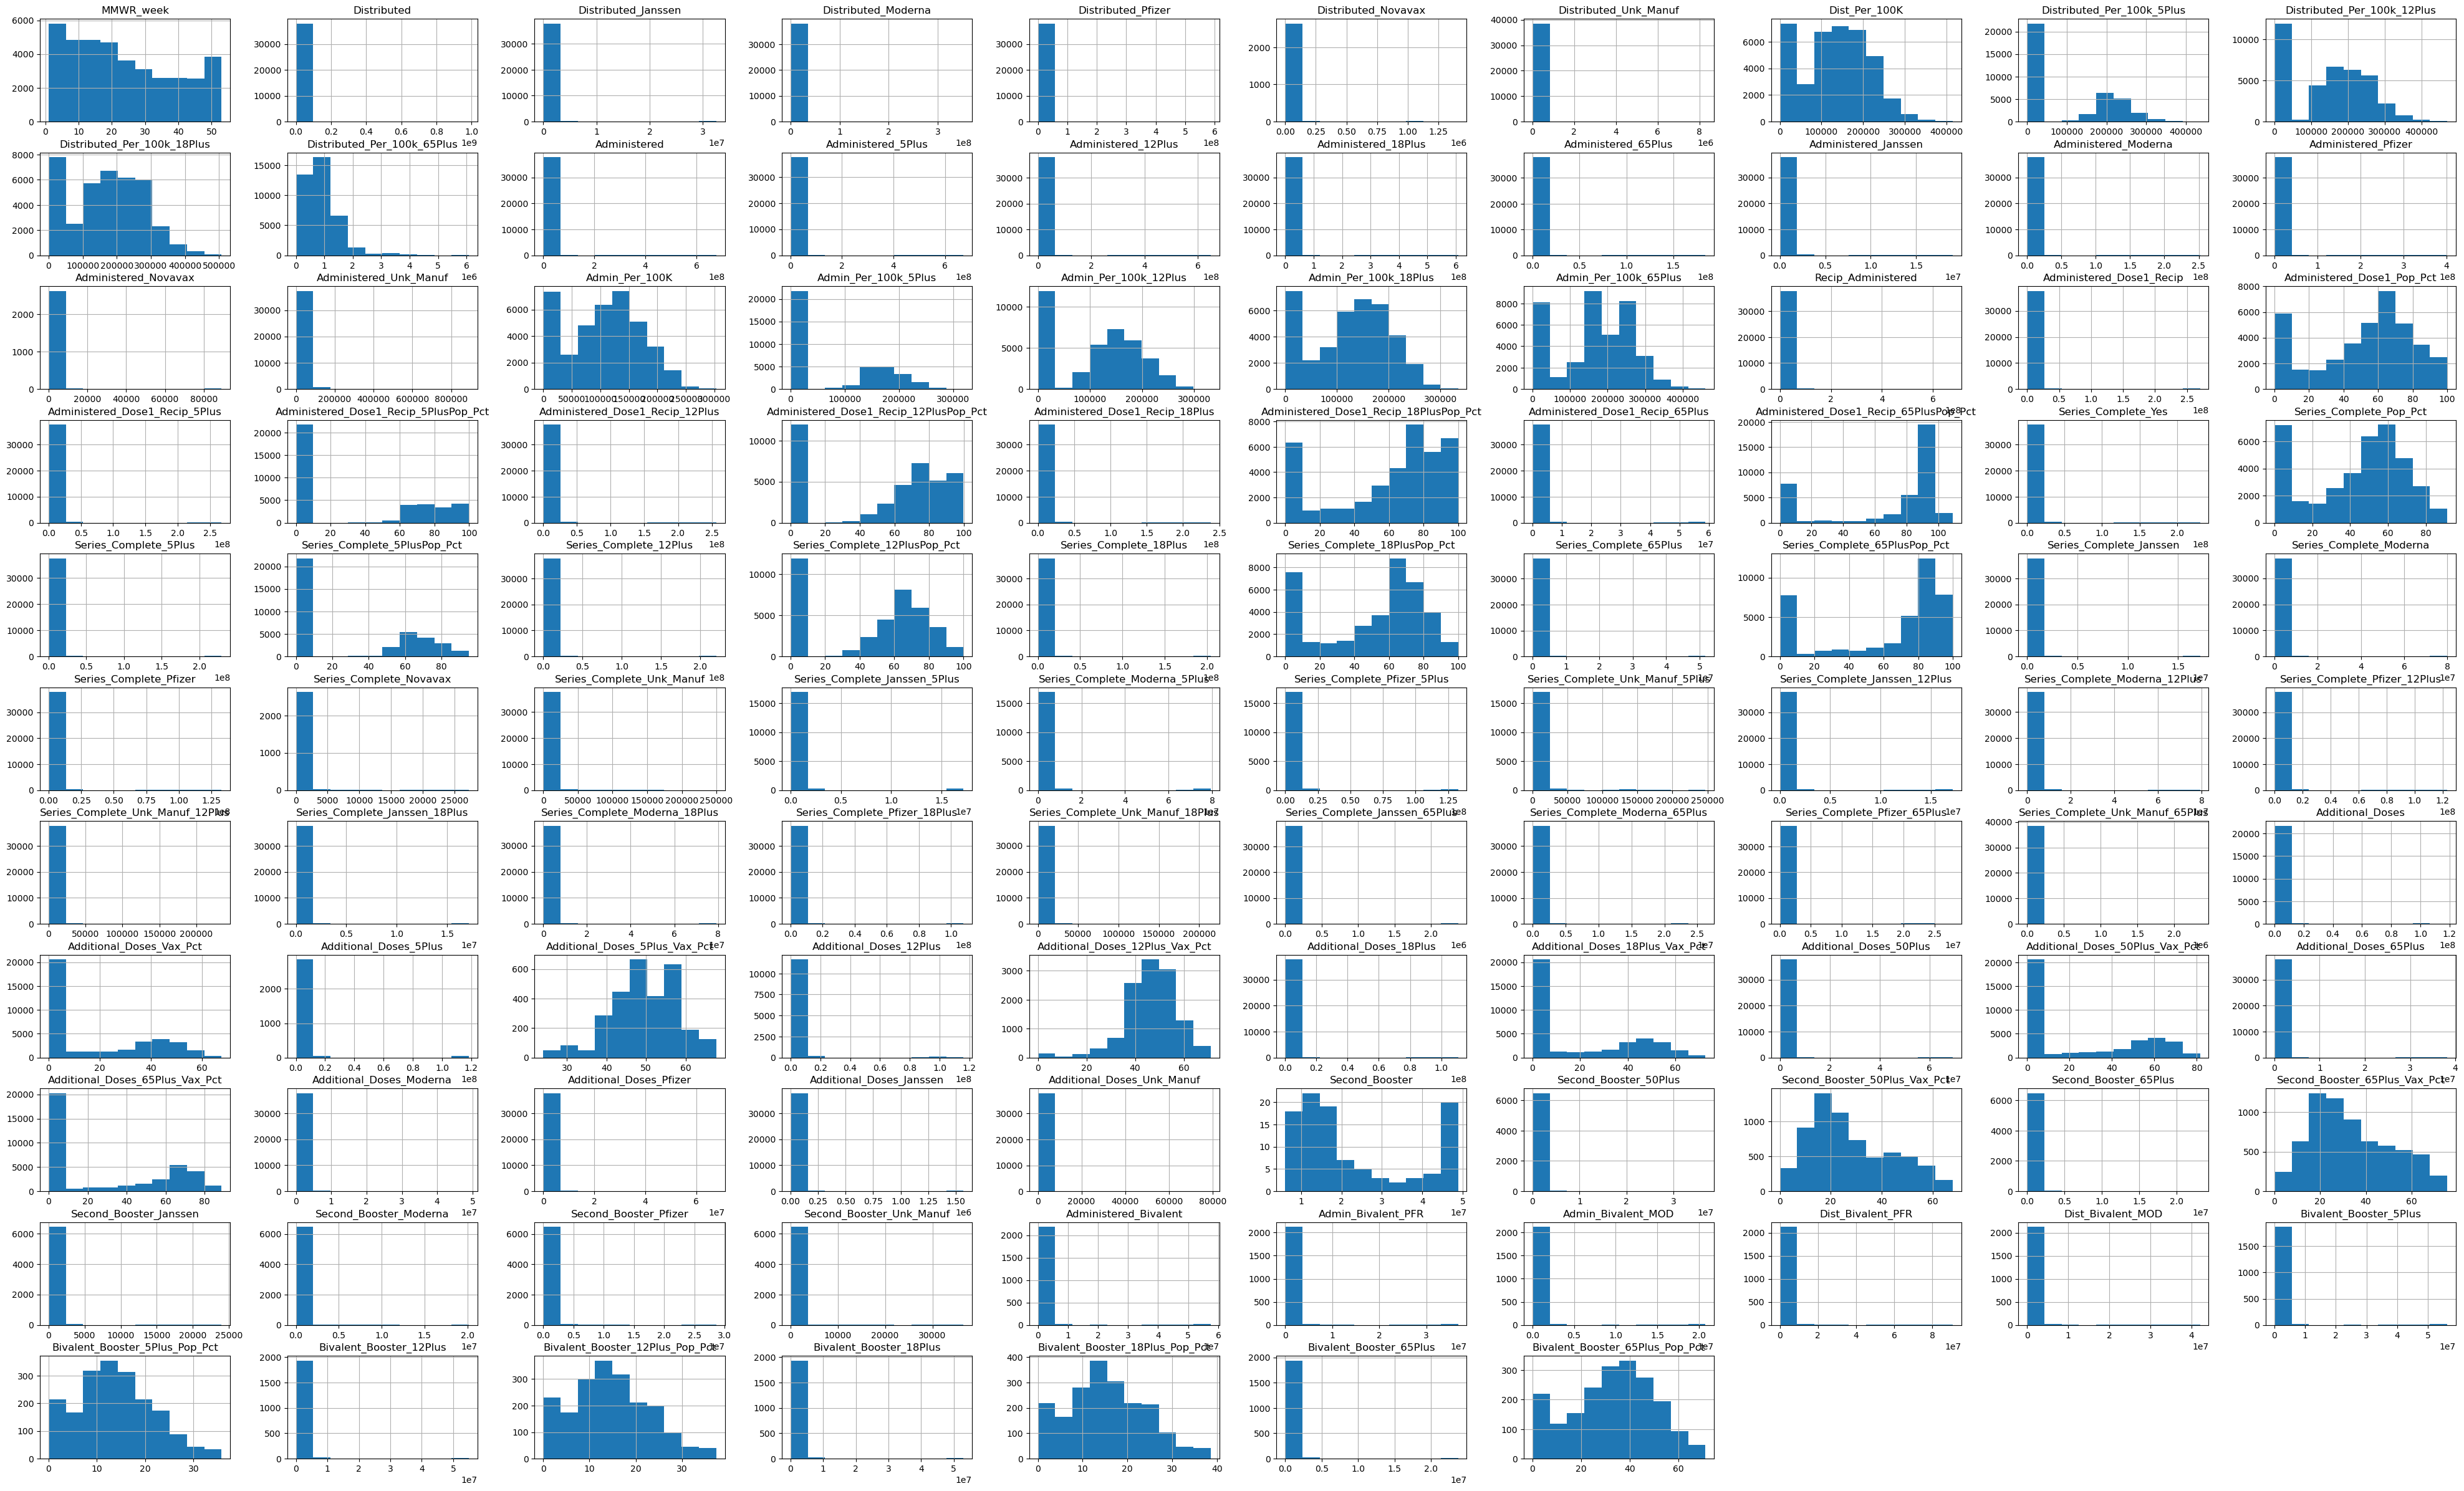

In [7]:
# finding continous/numerical variables
continuous_vars = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# plot d
%matplotlib inline
df.hist (column= continuous_vars,figsize= (50,30))
#hides array names that are otherwise printed
_ = plt.plot()

In [8]:
#...Distribution of categorical variables...#

In [9]:
# find categorical columns
non_numerical_col = [x for x in df.columns if x not in continuous_vars]
print(non_numerical_col)

['Date', 'Location']


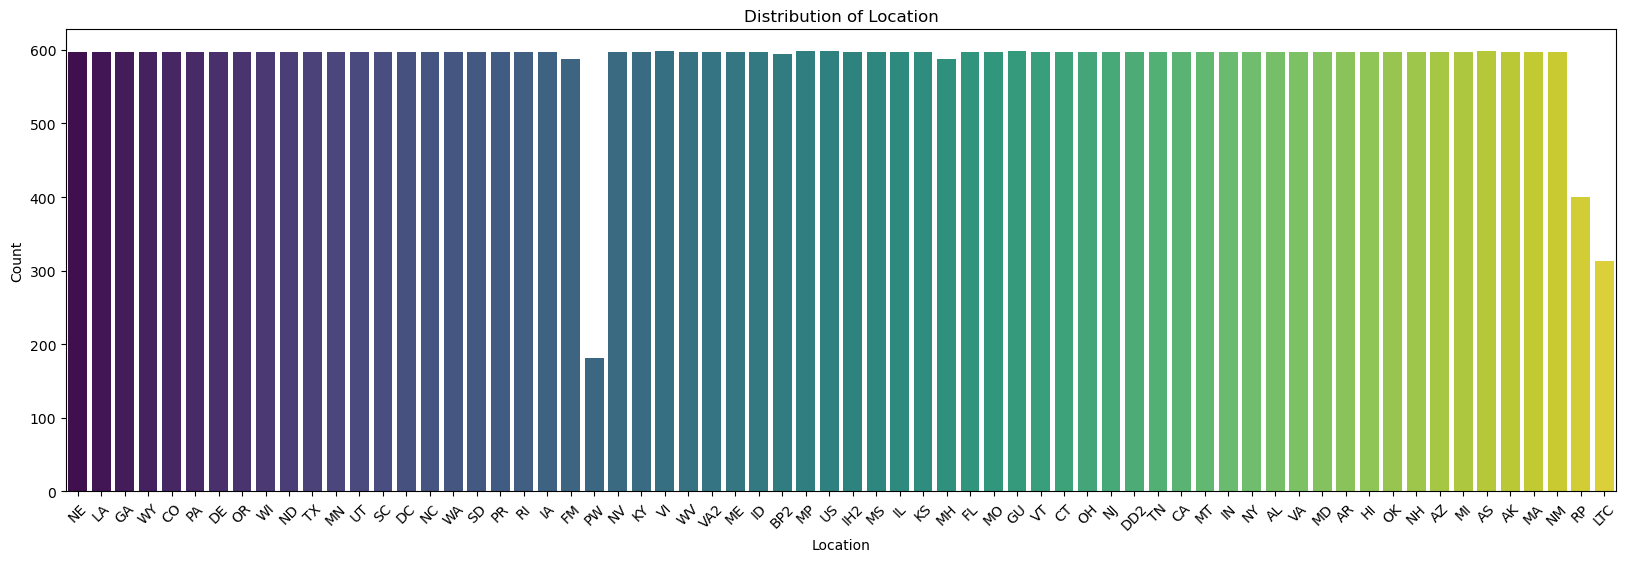

In [10]:
# Specifying the name of the categorical variable to plot
categorical_variable = 'Location'

# Create a countplot
plt.figure(figsize=(20, 6))  # Set the figure size
sns.countplot(data=df, x=categorical_variable, palette='viridis')  # Change the palette as desired
plt.title(f'Distribution of {categorical_variable}')
plt.xlabel(categorical_variable)
plt.ylabel('Count')

# Rotate x-axis labels for better readability 
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Data Preparation and Cleaning 

### Finding NaN values and variable removal

In [3]:
# remove columns with over 1000 missing
df = df.drop(columns=columns_with_over_1000_missing)

We have removed variables with over 1000 values missing as all of these variables corresponded to bivalent booster/ second booster distribution. Second booster did not come out until about a year after the initial booster we are focusing on. This is to prevent data leakage as our project focuses on predicting the percentage of population who has recived the initial booster and the second booster doses were not released until about a year later so the data for these vairables is missing as it did not exist at the point in time we are starting our data subset on.

### Removing Duplicate Columns
Many columns have two versions: number and percentage. We are focusing on percentage as it ensures all variables are in the same scale. Therefore we have removed all the numerical column equivalents and only kept the percentage columns.

In [14]:
# current column list
df.columns

Index(['Date', 'MMWR_week', 'Location', 'Distributed', 'Distributed_Janssen',
       'Distributed_Moderna', 'Distributed_Pfizer', 'Distributed_Unk_Manuf',
       'Dist_Per_100K', 'Distributed_Per_100k_5Plus',
       'Distributed_Per_100k_12Plus', 'Distributed_Per_100k_18Plus',
       'Distributed_Per_100k_65Plus', 'Administered', 'Administered_5Plus',
       'Administered_12Plus', 'Administered_18Plus', 'Administered_65Plus',
       'Administered_Janssen', 'Administered_Moderna', 'Administered_Pfizer',
       'Administered_Unk_Manuf', 'Admin_Per_100K', 'Admin_Per_100k_5Plus',
       'Admin_Per_100k_12Plus', 'Admin_Per_100k_18Plus',
       'Admin_Per_100k_65Plus', 'Recip_Administered',
       'Administered_Dose1_Recip', 'Administered_Dose1_Pop_Pct',
       'Administered_Dose1_Recip_5Plus',
       'Administered_Dose1_Recip_5PlusPop_Pct',
       'Administered_Dose1_Recip_12Plus',
       'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18Plus',
       'Administere

In [15]:
# list of numerical columns wihh equivalent percentage columns to drop
columns_to_drop = [
       'Administered_Dose1_Recip',   
       'Administered_Dose1_Recip_5Plus',
       'Administered_Dose1_Recip_12Plus',  
       'Administered_Dose1_Recip_18Plus',
       'Administered_Dose1_Recip_65Plus', 
        'Series_Complete_Yes',
        'Series_Complete_5Plus',
        'Series_Complete_12Plus',
        'Series_Complete_18Plus',
       'Series_Complete_65Plus',
       'Additional_Doses_18Plus', 
       'Additional_Doses_50Plus', 
       'Additional_Doses_65Plus']

# Dropping the columns from the df
df = df.drop(columns = columns_to_drop)

In [16]:
df.columns

Index(['Date', 'MMWR_week', 'Location', 'Distributed', 'Distributed_Janssen',
       'Distributed_Moderna', 'Distributed_Pfizer', 'Distributed_Unk_Manuf',
       'Dist_Per_100K', 'Distributed_Per_100k_5Plus',
       'Distributed_Per_100k_12Plus', 'Distributed_Per_100k_18Plus',
       'Distributed_Per_100k_65Plus', 'Administered', 'Administered_5Plus',
       'Administered_12Plus', 'Administered_18Plus', 'Administered_65Plus',
       'Administered_Janssen', 'Administered_Moderna', 'Administered_Pfizer',
       'Administered_Unk_Manuf', 'Admin_Per_100K', 'Admin_Per_100k_5Plus',
       'Admin_Per_100k_12Plus', 'Admin_Per_100k_18Plus',
       'Admin_Per_100k_65Plus', 'Recip_Administered',
       'Administered_Dose1_Pop_Pct', 'Administered_Dose1_Recip_5PlusPop_Pct',
       'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18PlusPop_Pct',
       'Administered_Dose1_Recip_65PlusPop_Pct', 'Series_Complete_Pop_Pct',
       'Series_Complete_5PlusPop_Pct', 'Series_Complet

### Subsetting Data based on the Booster release date

In [17]:
# Finding the range of Date column values
summary = df.Date.describe()
print(summary)

count                   38488
unique                    598
top       2021-10-07 00:00:00
freq                       65
first     2020-12-13 00:00:00
last      2023-05-10 00:00:00
Name: Date, dtype: object


In [18]:
# Defining response variable for easier 
pred_var = 'Additional_Doses_Vax_Pct' 

In [19]:
# Finding first day with registred values for our prediction variable

first_non_zero_date = df.loc[df[pred_var] != 0, 'Date'].min()

print("The first date with a non-zero percentage is:", first_non_zero_date)

The first date with a non-zero percentage is: 2021-09-25 00:00:00


In [20]:
# Define the start date
given_date = pd.to_datetime('2021-09-25')  # Adjust the date as needed

# Subset the DataFrame to include rows with dates greater than the start date
df = df[df['Date'] > given_date]

In [21]:
# final df size after removing unrelated variables and subsetting dates.
df.shape

(19930, 62)

### Dealing With Remaining NA Values

In [22]:
na = df.isna().sum()
na[na>0]

Distributed_Per_100k_5Plus               448
Administered_5Plus                       448
Administered_Unk_Manuf                     3
Admin_Per_100k_5Plus                     448
Administered_Dose1_Recip_5PlusPop_Pct    448
Series_Complete_5PlusPop_Pct             448
Series_Complete_Unk_Manuf                  4
Series_Complete_Unk_Manuf_12Plus           4
Series_Complete_Unk_Manuf_18Plus           4
Series_Complete_Unk_Manuf_65Plus           9
Additional_Doses_Vax_Pct                 260
Additional_Doses_18Plus_Vax_Pct          260
Additional_Doses_65Plus_Vax_Pct          260
Additional_Doses_Moderna                 260
Additional_Doses_Pfizer                  260
Additional_Doses_Janssen                 262
Additional_Doses_Unk_Manuf               266
dtype: int64

We noticed that a lot of the remaining columns we were missing were in regard to "5Plus". We have suspected this is because the age group 5-12 was the last one to get the vaccine. From research, in November of 2021, 5 year olds were able to get the vaccine. Thus we changed the start date to '2021-11-02'. This should not be an issue as it is only a month after the initial release.

In [23]:
# subset data based on new start date

given_date = pd.to_datetime('2021-11-02') 

df = df[df['Date'] > given_date]

In [24]:
# check new NaN counts
na = df.isna().sum()
na[na>0]

Administered_Unk_Manuf              3
Series_Complete_Unk_Manuf           4
Series_Complete_Unk_Manuf_12Plus    4
Series_Complete_Unk_Manuf_18Plus    4
Series_Complete_Unk_Manuf_65Plus    9
Additional_Doses_Janssen            2
Additional_Doses_Unk_Manuf          6
dtype: int64

As we can see, subsetting the data to after 11-02-2022, it got rid of all NA values except a few. Then wanted to see if the missing data all came from around the same time or was relatively spread out.

### Investigating remaining NaN values

In [25]:
df2 = df.set_index('Date')

# Count missing values for each date
missing_values_count = df2.isnull().sum(axis=1)

# Sort dates by missing values count in descending order
sorted_dates = missing_values_count.sort_values(ascending=False)

sorted_dates[sorted_dates>0]

Date
2022-12-14    6
2022-12-14    6
2022-12-14    5
2022-12-14    4
2022-12-14    3
2022-12-14    3
2022-12-14    2
2022-12-14    1
2022-12-14    1
2022-12-14    1
dtype: int64

In [26]:
dates = df[df['Date'] == '2022-12-14']
null = dates.isna().sum()
null[null>0]

Administered_Unk_Manuf              3
Series_Complete_Unk_Manuf           4
Series_Complete_Unk_Manuf_12Plus    4
Series_Complete_Unk_Manuf_18Plus    4
Series_Complete_Unk_Manuf_65Plus    9
Additional_Doses_Janssen            2
Additional_Doses_Unk_Manuf          6
dtype: int64

In [27]:
# All missing data from 12-14-2022, because there are multiple rows (for each state) with missing data
# corresponding to the date, we wanted to see which states were missing data

In [28]:
specific_day = '2022-12-14'  

specific_day_data = df.loc[df['Date'] == specific_day]

rows_with_missing_values = specific_day_data[specific_day_data.isnull().any(axis=1)]


location_values = rows_with_missing_values['Location'].tolist()
location_values

['VI', 'PW', 'BP2', 'AS', 'MP', 'FM', 'VA2', 'MH', 'IH2', 'ND']

In [29]:
df.Location.unique()

array(['NE', 'LA', 'GA', 'WY', 'CO', 'PA', 'DE', 'OR', 'WI', 'ND', 'TX',
       'MN', 'UT', 'SC', 'DC', 'NC', 'WA', 'SD', 'PR', 'RI', 'IA', 'FM',
       'PW', 'NV', 'KY', 'VI', 'WV', 'VA2', 'ME', 'ID', 'BP2', 'MP', 'US',
       'IH2', 'MS', 'IL', 'KS', 'MH', 'FL', 'MO', 'GU', 'VT', 'CT', 'OH',
       'NJ', 'DD2', 'TN', 'CA', 'MT', 'IN', 'NY', 'AL', 'VA', 'MD', 'AR',
       'HI', 'OK', 'NH', 'AZ', 'MI', 'AS', 'AK', 'MA', 'NM', 'RP'],
      dtype=object)

In [30]:
# We wanted to do a forward fill with this missing data
# To do this, we would have to identify the previous day data for those 10 states 
# We tried doing this with 2022-12-13 but was running into problems, until we noticed that at some point in our 
# data, rather than reporting daily, they changed it to reporting weekly

In [31]:
# Month column
df['month'] = df['Date'].dt.month

# Year column
df['year'] = df['Date'].dt.year

# Filter the DataFrame for dates in December 2022
december_2022_data = df[(df['year'] == 2022) & (df['month'] == 12)]

# Print the filtered DataFrame
print(december_2022_data.Date.unique())

# Found that we had to use a previous date of 12-07

['2022-12-28T00:00:00.000000000' '2022-12-21T00:00:00.000000000'
 '2022-12-14T00:00:00.000000000' '2022-12-07T00:00:00.000000000']


In [32]:
for location in location_values:
    # Subset data for the specific location
    location_data = df[df['Location'] == location]
    
    # Subset data for the specific dates
    dates_to_impute = location_data[location_data['Date'].isin(['2022-12-07', '2022-12-14'])]
    
    # Perform forward fill (LOCF) imputation for the specific location and dates
    imputed_data = dates_to_impute.bfill()
    
    # Update the original DataFrame with the imputed data for the current location
    df.loc[imputed_data.index, imputed_data.columns] = imputed_data

In [33]:
na = df.isna().sum()
na[na>0]

Series([], dtype: int64)

In [34]:
# Got rid of all the NA data
# Ended up having to do bfill() rather than ffill() because '2022-12-14' came in a row before '2022-12-07'

### Changing the Date variable from daily to weekly.

In [35]:
# As we noticed earlier, in December 2022, they only captured 4 days in the month (once a week)
# Found that June 2022 was the first month they started gathering data only once a week

In [36]:
june_2022_data = df[(df['year'] == 2022) & (df['month'] == 6)]

print(june_2022_data.Date.unique())

['2022-06-29T00:00:00.000000000' '2022-06-22T00:00:00.000000000'
 '2022-06-16T00:00:00.000000000' '2022-06-15T00:00:00.000000000'
 '2022-06-14T00:00:00.000000000' '2022-06-13T00:00:00.000000000'
 '2022-06-12T00:00:00.000000000' '2022-06-11T00:00:00.000000000'
 '2022-06-10T00:00:00.000000000' '2022-06-09T00:00:00.000000000'
 '2022-06-08T00:00:00.000000000' '2022-06-07T00:00:00.000000000'
 '2022-06-06T00:00:00.000000000' '2022-06-05T00:00:00.000000000'
 '2022-06-04T00:00:00.000000000' '2022-06-03T00:00:00.000000000'
 '2022-06-02T00:00:00.000000000' '2022-06-01T00:00:00.000000000']


In [37]:
# The earlier months in the dataset were captured daily

dec_2021_data = df[(df['year'] == 2021) & (df['month'] == 12)]

print(dec_2021_data.Date.unique())

['2021-12-31T00:00:00.000000000' '2021-12-30T00:00:00.000000000'
 '2021-12-29T00:00:00.000000000' '2021-12-28T00:00:00.000000000'
 '2021-12-27T00:00:00.000000000' '2021-12-26T00:00:00.000000000'
 '2021-12-25T00:00:00.000000000' '2021-12-24T00:00:00.000000000'
 '2021-12-23T00:00:00.000000000' '2021-12-22T00:00:00.000000000'
 '2021-12-21T00:00:00.000000000' '2021-12-20T00:00:00.000000000'
 '2021-12-19T00:00:00.000000000' '2021-12-18T00:00:00.000000000'
 '2021-12-17T00:00:00.000000000' '2021-12-16T00:00:00.000000000'
 '2021-12-15T00:00:00.000000000' '2021-12-14T00:00:00.000000000'
 '2021-12-13T00:00:00.000000000' '2021-12-12T00:00:00.000000000'
 '2021-12-11T00:00:00.000000000' '2021-12-10T00:00:00.000000000'
 '2021-12-09T00:00:00.000000000' '2021-12-08T00:00:00.000000000'
 '2021-12-07T00:00:00.000000000' '2021-12-06T00:00:00.000000000'
 '2021-12-05T00:00:00.000000000' '2021-12-04T00:00:00.000000000'
 '2021-12-03T00:00:00.000000000' '2021-12-02T00:00:00.000000000'
 '2021-12-01T00:00:00.000

In [38]:
# To ensure consistency, we are going to convert the dataset so that data is reported once a week

In [39]:
# Start by identifying if there is only a day of the week that they captured the data

In [40]:
# Day of the week column
df['day_of_week'] = df['Date'].dt.day_name()

# Identifying day of week
given_date = pd.to_datetime('2022-06-22') 
days = df[df['Date'] > given_date]
days['day_of_week'].unique()

array(['Wednesday'], dtype=object)

In [41]:
# Starting for when the data is weekly, only Wednesdays are captured. 
# Subset the data to only Wednesdays

In [42]:
df = df[df['day_of_week'] == 'Wednesday']

In [43]:
df.Date.unique()

array(['2023-05-10T00:00:00.000000000', '2023-05-03T00:00:00.000000000',
       '2023-04-26T00:00:00.000000000', '2023-04-19T00:00:00.000000000',
       '2023-04-12T00:00:00.000000000', '2023-04-05T00:00:00.000000000',
       '2023-03-29T00:00:00.000000000', '2023-03-22T00:00:00.000000000',
       '2023-03-15T00:00:00.000000000', '2023-03-08T00:00:00.000000000',
       '2023-03-01T00:00:00.000000000', '2023-02-22T00:00:00.000000000',
       '2023-02-15T00:00:00.000000000', '2023-02-08T00:00:00.000000000',
       '2023-02-01T00:00:00.000000000', '2023-01-25T00:00:00.000000000',
       '2023-01-18T00:00:00.000000000', '2023-01-11T00:00:00.000000000',
       '2023-01-04T00:00:00.000000000', '2022-12-28T00:00:00.000000000',
       '2022-12-21T00:00:00.000000000', '2022-12-14T00:00:00.000000000',
       '2022-12-07T00:00:00.000000000', '2022-11-30T00:00:00.000000000',
       '2022-11-23T00:00:00.000000000', '2022-11-16T00:00:00.000000000',
       '2022-11-09T00:00:00.000000000', '2022-11-02

In [44]:
# Checking shape of new dataframe
df.shape

(5120, 65)

## Feature Engineering 
### Creating more columns based on the `Date` column

In [45]:
# Quarter column
df['quarter'] = df['Date'].dt.quarter

# Day of year column
df['dayofyear'] = df['Date'].dt.dayofyear

# Day of month column
df['dayofmonth'] = df['Date'].dt.day

# Week of year column
df['weekofyear'] = df['Date'].dt.isocalendar().week.astype(np.int64)

### Weekend Boolean column

In [4]:
# Define the function to find weekend values
def weekend(dow):
    if dow == 'Saturday' or dow == 'Sunday':
        return True
    else:
        return False
    
# Apply the function to the Age column using the apply() function
df['weekend'] = df['day_of_week'].apply(weekend)

### Season column

In [5]:
# Defining function to identify season
def get_season(date):
    month = date.month
    day = date.day
    if month in [3, 4, 5]:
        season = 'spring'
    elif month in [6, 7, 8]:
        season = 'summer'
    elif month in [9, 10, 11]:
        season = 'fall'
    else:
        season = 'winter'
    

    if month == 3 and day < 20:
        season = 'winter'
    elif month == 6 and day < 21:
        season = 'spring'
    elif month == 9 and day < 22:
        season = 'summer'
    elif month == 12 and day < 21:
        season = 'fall'
    
    return season

# Applying function and creating season column
df['season'] = df['Date'].apply(get_season)

### Holiday Columns

In [6]:
# Create a list of US holidays for the given year range in the dataframe
us_holidays = holidays.US(years=[df['Date'].dt.year.min(), df['Date'].dt.year.max()]).keys()

# Convert us_holidays to a pandas Series of datetime objects
us_holidays_series = pd.Series(pd.to_datetime(list(us_holidays)))

# Create Holiday column
df['holidays'] = df['Date'].isin(us_holidays_series) | (df['Date'] + pd.Timedelta(days=1)).isin(us_holidays_series)
df['holidays'] = df['holidays'].replace({True: 'Holiday', False: 'Normal day'})

# Determine which weeks have a holiday
holiday_weeks = us_holidays_series.dt.strftime('%U-%Y').unique()

# Assign a "holiday season" for every date that's within a week having a holiday
df['holiday_season'] = df['Date'].dt.strftime('%U-%Y').isin(holiday_weeks)

### Vaccine Announcement Column 

In [7]:
# Define a list of unique announcement dates
announcement_dates = [
    "04/28/2023", "04/27/2023", "04/18/2023", "03/14/2023", "03/10/2023",
    "12/16/2022", "12/08/2022", "10/21/2022", "10/12/2022", "09/13/2022",
    "08/31/2022", "08/26/2022", "08/19/2022", "07/13/2022", "07/08/2022",
    "06/30/2022", "06/17/2022", "05/17/2022", "05/05/2022", "04/29/2022",
    "04/15/2022", "04/01/2022", "03/29/2022", "03/21/2022", "03/11/2022",
    "02/11/2022", "02/01/2022", "01/31/2022", "01/11/2022", "01/07/2022",
    "01/03/2022", "12/17/2021", "12/14/2021", "12/09/2021", "11/30/2021",
    "11/19/2021", "10/29/2021", "10/26/2021", "10/22/2021", "10/20/2021",
    "10/14/2021", "10/01/2021", "09/24/2021", "09/22/2021", "09/20/2021",
    "09/17/2021", "09/10/2021", "09/02/2021", "09/01/2021", "08/24/2021",
    "08/23/2021", "08/18/2021", "08/13/2021", "08/12/2021", "08/06/2021",
    "08/03/2021", "07/30/2021", "07/16/2021", "07/13/2021", "07/08/2021",
    "07/06/2021", "07/02/2021", "06/29/2021", "06/25/2021", "06/15/2021",
    "06/11/2021", "06/10/2021", "05/25/2021", "05/19/2021", "05/11/2021",
    "05/10/2021", "04/27/2021", "04/23/2021", "04/21/2021", "04/16/2021",
    "04/13/2021", "04/12/2021", "04/01/2021", "03/26/2021", "03/24/2021",
    "03/17/2021", "03/05/2021", "03/02/2021", "02/27/2021", "02/26/2021",
    "02/25/2021", "02/23/2021", "02/22/2021", "02/12/2021", "02/05/2021",
    "02/04/2021", "01/29/2021", "01/14/2021", "01/04/2021", "12/28/2020",
    "12/22/2020", "12/21/2020", "12/18/2020", "12/17/2020", "12/14/2020", "12/12/2020"
]

# Convert to datetime and deduplicate
announcement_dates = list(set([pd.to_datetime(date) for date in announcement_dates]))

# Convert announcement dates to week-year format
announcement_weeks = [date.strftime('%U-%Y') for date in announcement_dates]

# Check if the date in the dataset is within the same week of any announcement dates
def in_announcement_week(date):
    return date.strftime('%U-%Y') in announcement_weeks

# Create the 'vax_announcement' column
df['vax_announcement'] = df['Date'].apply(near_announcement)


## Data Preparation and Cleaning 

### Finding NaN values and variable removal

In [8]:
# find na value counts
missing_counts = df.isna().sum()

# Sort the missing value counts in descending order
missing_counts_sorted = missing_counts.sort_values(ascending=False)

# Display the sorted missing value counts
with pd.option_context("display.max_rows", None):
    print(missing_counts_sorted)

Second_Booster                            38385
Bivalent_Booster_5Plus_Pop_Pct            36568
Bivalent_Booster_5Plus                    36568
Bivalent_Booster_65Plus_Pop_Pct           36504
Bivalent_Booster_18Plus                   36504
Bivalent_Booster_65Plus                   36504
Bivalent_Booster_12Plus_Pop_Pct           36504
Bivalent_Booster_12Plus                   36504
Bivalent_Booster_18Plus_Pop_Pct           36504
Dist_Bivalent_PFR                         36312
Admin_Bivalent_MOD                        36312
Admin_Bivalent_PFR                        36312
Dist_Bivalent_MOD                         36312
Administered_Bivalent                     36248
Series_Complete_Novavax                   35808
Administered_Novavax                      35807
Distributed_Novavax                       35800
Additional_Doses_5Plus_Vax_Pct            35544
Additional_Doses_5Plus                    35544
Second_Booster_Unk_Manuf                  31907
Second_Booster_Janssen                  

In [9]:
# columns with over 1000 missing values
columns_with_over_1000_missing = missing_counts_sorted[missing_counts_sorted > 1000].index

# Return the names of columns with missing value sum over 1000
columns_with_over_1000_missing

Index(['Second_Booster', 'Bivalent_Booster_5Plus_Pop_Pct',
       'Bivalent_Booster_5Plus', 'Bivalent_Booster_65Plus_Pop_Pct',
       'Bivalent_Booster_18Plus', 'Bivalent_Booster_65Plus',
       'Bivalent_Booster_12Plus_Pop_Pct', 'Bivalent_Booster_12Plus',
       'Bivalent_Booster_18Plus_Pop_Pct', 'Dist_Bivalent_PFR',
       'Admin_Bivalent_MOD', 'Admin_Bivalent_PFR', 'Dist_Bivalent_MOD',
       'Administered_Bivalent', 'Series_Complete_Novavax',
       'Administered_Novavax', 'Distributed_Novavax',
       'Additional_Doses_5Plus_Vax_Pct', 'Additional_Doses_5Plus',
       'Second_Booster_Unk_Manuf', 'Second_Booster_Janssen',
       'Second_Booster_Pfizer', 'Second_Booster_65Plus',
       'Second_Booster_50Plus_Vax_Pct', 'Second_Booster_65Plus_Vax_Pct',
       'Second_Booster_50Plus', 'Second_Booster_Moderna',
       'Additional_Doses_12Plus_Vax_Pct', 'Additional_Doses_12Plus',
       'Series_Complete_Unk_Manuf_5Plus', 'Series_Complete_Janssen_5Plus',
       'Series_Complete_Moderna_5Pl

In [10]:
# remove columns with over 1000 missing
df = df.drop(columns=columns_with_over_1000_missing)

We have removed variables with over 1000 values missing as all of these variables corresponded to bivalent booster/ second booster distribution. Second booster did not come out until about a year after the initial booster we are focusing on. This is to prevent data leakage as our project focuses on predicting the percentage of population who has recived the initial booster and the second booster doses were not released until about a year later so the data for these vairables is missing as it did not exist at the point in time we are starting our data subset on.

### Removing Duplicate Columns
#### Many columns have two versions: number and percentage. We are focusing on percentage as it ensures all variables are in the same scale. Therefore we have removed all the numerical column equivalents and only kept the percentage columns.

In [11]:
# current column list
df.columns

Index(['Date', 'MMWR_week', 'Location', 'Distributed', 'Distributed_Janssen',
       'Distributed_Moderna', 'Distributed_Pfizer', 'Distributed_Unk_Manuf',
       'Dist_Per_100K', 'Distributed_Per_100k_5Plus',
       'Distributed_Per_100k_12Plus', 'Distributed_Per_100k_18Plus',
       'Distributed_Per_100k_65Plus', 'Administered', 'Administered_5Plus',
       'Administered_12Plus', 'Administered_18Plus', 'Administered_65Plus',
       'Administered_Janssen', 'Administered_Moderna', 'Administered_Pfizer',
       'Administered_Unk_Manuf', 'Admin_Per_100K', 'Admin_Per_100k_5Plus',
       'Admin_Per_100k_12Plus', 'Admin_Per_100k_18Plus',
       'Admin_Per_100k_65Plus', 'Recip_Administered',
       'Administered_Dose1_Recip', 'Administered_Dose1_Pop_Pct',
       'Administered_Dose1_Recip_5Plus',
       'Administered_Dose1_Recip_5PlusPop_Pct',
       'Administered_Dose1_Recip_12Plus',
       'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18Plus',
       'Administere

In [12]:
# list of numerical columns wihh equivalent percentage columns to drop
columns_to_drop = [
       'Administered_Dose1_Recip',   
       'Administered_Dose1_Recip_5Plus',
       'Administered_Dose1_Recip_12Plus',  
       'Administered_Dose1_Recip_18Plus',
       'Administered_Dose1_Recip_65Plus', 
        'Series_Complete_Yes',
        'Series_Complete_5Plus',
        'Series_Complete_12Plus',
        'Series_Complete_18Plus',
       'Series_Complete_65Plus',
       'Additional_Doses_18Plus', 
       'Additional_Doses_50Plus', 
       'Additional_Doses_65Plus']

# Dropping the columns from the df
df = df.drop(columns = columns_to_drop)

In [13]:
df.columns

Index(['Date', 'MMWR_week', 'Location', 'Distributed', 'Distributed_Janssen',
       'Distributed_Moderna', 'Distributed_Pfizer', 'Distributed_Unk_Manuf',
       'Dist_Per_100K', 'Distributed_Per_100k_5Plus',
       'Distributed_Per_100k_12Plus', 'Distributed_Per_100k_18Plus',
       'Distributed_Per_100k_65Plus', 'Administered', 'Administered_5Plus',
       'Administered_12Plus', 'Administered_18Plus', 'Administered_65Plus',
       'Administered_Janssen', 'Administered_Moderna', 'Administered_Pfizer',
       'Administered_Unk_Manuf', 'Admin_Per_100K', 'Admin_Per_100k_5Plus',
       'Admin_Per_100k_12Plus', 'Admin_Per_100k_18Plus',
       'Admin_Per_100k_65Plus', 'Recip_Administered',
       'Administered_Dose1_Pop_Pct', 'Administered_Dose1_Recip_5PlusPop_Pct',
       'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18PlusPop_Pct',
       'Administered_Dose1_Recip_65PlusPop_Pct', 'Series_Complete_Pop_Pct',
       'Series_Complete_5PlusPop_Pct', 'Series_Complet

### Subsetting Data based on the Booster release date

In [14]:
# Finding the range of Date column values

import warnings
# Suppress all warnings
warnings.simplefilter("ignore")

### Finding the data range of the Date column
summary = df.Date.describe()
#summary = summary.T
print(summary)

count                   38488
unique                    598
top       2021-10-07 00:00:00
freq                       65
first     2020-12-13 00:00:00
last      2023-05-10 00:00:00
Name: Date, dtype: object


In [15]:
# Defining response variable for easier 
pred_var = 'Additional_Doses_Vax_Pct' 

In [16]:
# Finding first day with registred values for our prediction variable

first_non_zero_date = df.loc[df[pred_var] != 0, 'Date'].min()

print("The first date with a non-zero percentage is:", first_non_zero_date)

The first date with a non-zero percentage is: 2021-09-25 00:00:00


In [17]:
# Define the start date
given_date = pd.to_datetime('2021-09-25')  # Adjust the date as needed

# Subset the DataFrame to include rows with dates greater than the start date
df = df[df['Date'] > given_date]

In [18]:
# final df size after removing unrelated variables and subsetting dates.
df.shape

(19930, 74)

### Dealing With Remaining NA Values

In [19]:
na = df.isna().sum()
na[na>0]

Distributed_Per_100k_5Plus               448
Administered_5Plus                       448
Administered_Unk_Manuf                     3
Admin_Per_100k_5Plus                     448
Administered_Dose1_Recip_5PlusPop_Pct    448
Series_Complete_5PlusPop_Pct             448
Series_Complete_Unk_Manuf                  4
Series_Complete_Unk_Manuf_12Plus           4
Series_Complete_Unk_Manuf_18Plus           4
Series_Complete_Unk_Manuf_65Plus           9
Additional_Doses_Vax_Pct                 260
Additional_Doses_18Plus_Vax_Pct          260
Additional_Doses_65Plus_Vax_Pct          260
Additional_Doses_Moderna                 260
Additional_Doses_Pfizer                  260
Additional_Doses_Janssen                 262
Additional_Doses_Unk_Manuf               266
dtype: int64

We noticed that a lot of the remaining columns we were missing were in regard to "5Plus". We have suspected this is because the age group 5-12 was the last one to get the vaccine. From research, in November of 2021, 5 year olds were able to get the vaccine. Thus we changed the start date to '2021-11-02'. This should not be an issue as it is only a month after the initial release.

In [20]:
# subset data based on new start date

given_date = pd.to_datetime('2021-11-02') 

df = df[df['Date'] > given_date]

In [21]:
# check new NaN counts
na = df.isna().sum()
na[na>0]

Administered_Unk_Manuf              3
Series_Complete_Unk_Manuf           4
Series_Complete_Unk_Manuf_12Plus    4
Series_Complete_Unk_Manuf_18Plus    4
Series_Complete_Unk_Manuf_65Plus    9
Additional_Doses_Janssen            2
Additional_Doses_Unk_Manuf          6
dtype: int64

As we can see, subsetting the data to after 11-02-2022, it got rid of all NA values except a few. Then wanted to see if the missing data all came from around the same time or was relatively spread out.

### Investigating remaining NaN values

In [22]:
df2 = df.set_index('Date')

# Count missing values for each date
missing_values_count = df2.isnull().sum(axis=1)

# Sort dates by missing values count in descending order
sorted_dates = missing_values_count.sort_values(ascending=False)

sorted_dates[sorted_dates>0]

Date
2022-12-14    6
2022-12-14    6
2022-12-14    5
2022-12-14    4
2022-12-14    3
2022-12-14    3
2022-12-14    2
2022-12-14    1
2022-12-14    1
2022-12-14    1
dtype: int64

In [23]:
dates = df[df['Date'] == '2022-12-14']
null = dates.isna().sum()
null[null>0]

Administered_Unk_Manuf              3
Series_Complete_Unk_Manuf           4
Series_Complete_Unk_Manuf_12Plus    4
Series_Complete_Unk_Manuf_18Plus    4
Series_Complete_Unk_Manuf_65Plus    9
Additional_Doses_Janssen            2
Additional_Doses_Unk_Manuf          6
dtype: int64

In [24]:
# All missing data from 12-14-2022, because there are multiple rows (for each state) corresponding to the date, 
# wanted to see which states were missing data

In [25]:
specific_day = '2022-12-14'  

specific_day_data = df.loc[df['Date'] == specific_day]

rows_with_missing_values = specific_day_data[specific_day_data.isnull().any(axis=1)]


location_values = rows_with_missing_values['Location'].tolist()
location_values

['VI', 'PW', 'BP2', 'AS', 'MP', 'FM', 'VA2', 'MH', 'IH2', 'ND']

In [26]:
df.Location.unique()

array(['NE', 'LA', 'GA', 'WY', 'CO', 'PA', 'DE', 'OR', 'WI', 'ND', 'TX',
       'MN', 'UT', 'SC', 'DC', 'NC', 'WA', 'SD', 'PR', 'RI', 'IA', 'FM',
       'PW', 'NV', 'KY', 'VI', 'WV', 'VA2', 'ME', 'ID', 'BP2', 'MP', 'US',
       'IH2', 'MS', 'IL', 'KS', 'MH', 'FL', 'MO', 'GU', 'VT', 'CT', 'OH',
       'NJ', 'DD2', 'TN', 'CA', 'MT', 'IN', 'NY', 'AL', 'VA', 'MD', 'AR',
       'HI', 'OK', 'NH', 'AZ', 'MI', 'AS', 'AK', 'MA', 'NM', 'RP'],
      dtype=object)

In [27]:
# We wanted to do a forward fill with this missing data
# To do this, we would have to identify the previous day data for those 10 states 
# We tried doing this with 2022-12-13 but was running into problems, until we noticed that at some point in our data,
# rather than reporting daily, they changed it to reporting weekly

In [28]:
# Filter the DataFrame for dates in December 2022
december_2022_data = df[(df['Date'].dt.year == 2022) & (df['Date'].dt.month == 12)]

# Print the filtered DataFrame
print(december_2022_data.Date.unique())

# Found that we had to use a previous date of 12-07

['2022-12-28T00:00:00.000000000' '2022-12-21T00:00:00.000000000'
 '2022-12-14T00:00:00.000000000' '2022-12-07T00:00:00.000000000']


In [29]:
for location in location_values:
    # Subset data for the specific location
    location_data = df[df['Location'] == location]
    
    # Subset data for the specific dates
    dates_to_impute = location_data[location_data['Date'].isin(['2022-12-07', '2022-12-14'])]
    
    # Perform forward fill (LOCF) imputation for the specific location and dates
    imputed_data = dates_to_impute.bfill()
    
    # Update the original DataFrame with the imputed data for the current location
    df.loc[imputed_data.index, imputed_data.columns] = imputed_data

In [30]:
na = df.isna().sum()
na[na>0]

Series([], dtype: int64)

In [31]:
# Got rid of all the NA data
# Ended up having to do bfill() rather than ffill() because '2022-12-14' came in a row before '2022-12-07'

### Changing the Date variable from daily to weekly.

In [32]:
# As we noticed earlier, in December 2022, they only captured 4 days in the month (once a week)
# Found that June 2022 was the first month they started gathering data only once a week

In [33]:
june_2022_data = df[(df['Date'].dt.year == 2022) & (df['Date'].dt.month == 6)]

print(june_2022_data.Date.unique())

['2022-06-29T00:00:00.000000000' '2022-06-22T00:00:00.000000000'
 '2022-06-16T00:00:00.000000000' '2022-06-15T00:00:00.000000000'
 '2022-06-14T00:00:00.000000000' '2022-06-13T00:00:00.000000000'
 '2022-06-12T00:00:00.000000000' '2022-06-11T00:00:00.000000000'
 '2022-06-10T00:00:00.000000000' '2022-06-09T00:00:00.000000000'
 '2022-06-08T00:00:00.000000000' '2022-06-07T00:00:00.000000000'
 '2022-06-06T00:00:00.000000000' '2022-06-05T00:00:00.000000000'
 '2022-06-04T00:00:00.000000000' '2022-06-03T00:00:00.000000000'
 '2022-06-02T00:00:00.000000000' '2022-06-01T00:00:00.000000000']


In [34]:
# The earlier months in the dataset were captured daily

dec_2021_data = df[(df['Date'].dt.year == 2021) & (df['Date'].dt.month == 12)]

print(dec_2021_data.Date.unique())

['2021-12-31T00:00:00.000000000' '2021-12-30T00:00:00.000000000'
 '2021-12-29T00:00:00.000000000' '2021-12-28T00:00:00.000000000'
 '2021-12-27T00:00:00.000000000' '2021-12-26T00:00:00.000000000'
 '2021-12-25T00:00:00.000000000' '2021-12-24T00:00:00.000000000'
 '2021-12-23T00:00:00.000000000' '2021-12-22T00:00:00.000000000'
 '2021-12-21T00:00:00.000000000' '2021-12-20T00:00:00.000000000'
 '2021-12-19T00:00:00.000000000' '2021-12-18T00:00:00.000000000'
 '2021-12-17T00:00:00.000000000' '2021-12-16T00:00:00.000000000'
 '2021-12-15T00:00:00.000000000' '2021-12-14T00:00:00.000000000'
 '2021-12-13T00:00:00.000000000' '2021-12-12T00:00:00.000000000'
 '2021-12-11T00:00:00.000000000' '2021-12-10T00:00:00.000000000'
 '2021-12-09T00:00:00.000000000' '2021-12-08T00:00:00.000000000'
 '2021-12-07T00:00:00.000000000' '2021-12-06T00:00:00.000000000'
 '2021-12-05T00:00:00.000000000' '2021-12-04T00:00:00.000000000'
 '2021-12-03T00:00:00.000000000' '2021-12-02T00:00:00.000000000'
 '2021-12-01T00:00:00.000

In [35]:
# To ensure consistency, we are going to make the entire data once a week

In [36]:
# Start by identifying if there is only a day of the week that they captured the data

In [37]:
given_date = pd.to_datetime('2022-06-22') 
days = df[df['Date'] > given_date]
days['day_of_week'].unique()

array(['Wednesday'], dtype=object)

In [38]:
# Starting for when the data is weekly, only Wednesdays are captured. 
# Subset the data to only Wednesdays

In [39]:
df = df[df['day_of_week'] == 'Wednesday']

In [40]:
df.Date.unique()

array(['2023-05-10T00:00:00.000000000', '2023-05-03T00:00:00.000000000',
       '2023-04-26T00:00:00.000000000', '2023-04-19T00:00:00.000000000',
       '2023-04-12T00:00:00.000000000', '2023-04-05T00:00:00.000000000',
       '2023-03-29T00:00:00.000000000', '2023-03-22T00:00:00.000000000',
       '2023-03-15T00:00:00.000000000', '2023-03-08T00:00:00.000000000',
       '2023-03-01T00:00:00.000000000', '2023-02-22T00:00:00.000000000',
       '2023-02-15T00:00:00.000000000', '2023-02-08T00:00:00.000000000',
       '2023-02-01T00:00:00.000000000', '2023-01-25T00:00:00.000000000',
       '2023-01-18T00:00:00.000000000', '2023-01-11T00:00:00.000000000',
       '2023-01-04T00:00:00.000000000', '2022-12-28T00:00:00.000000000',
       '2022-12-21T00:00:00.000000000', '2022-12-14T00:00:00.000000000',
       '2022-12-07T00:00:00.000000000', '2022-11-30T00:00:00.000000000',
       '2022-11-23T00:00:00.000000000', '2022-11-16T00:00:00.000000000',
       '2022-11-09T00:00:00.000000000', '2022-11-02

In [41]:
df.shape

(5120, 74)

## EDA Response Variable Visuals
### Univariate Analysis

<Axes: xlabel='Additional_Doses_Vax_Pct', ylabel='Count'>

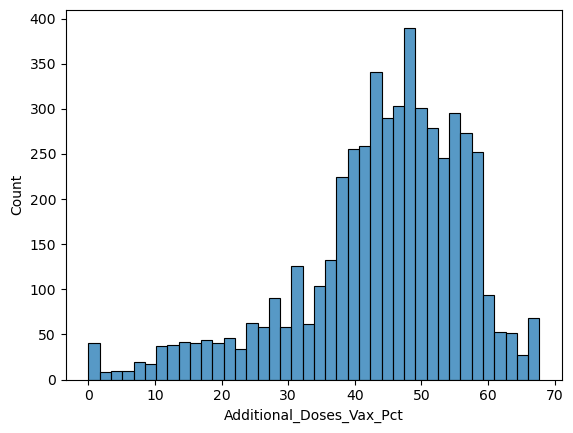

In [42]:
# Distribution of response variable
sns.histplot(df[pred_var], kde=False )

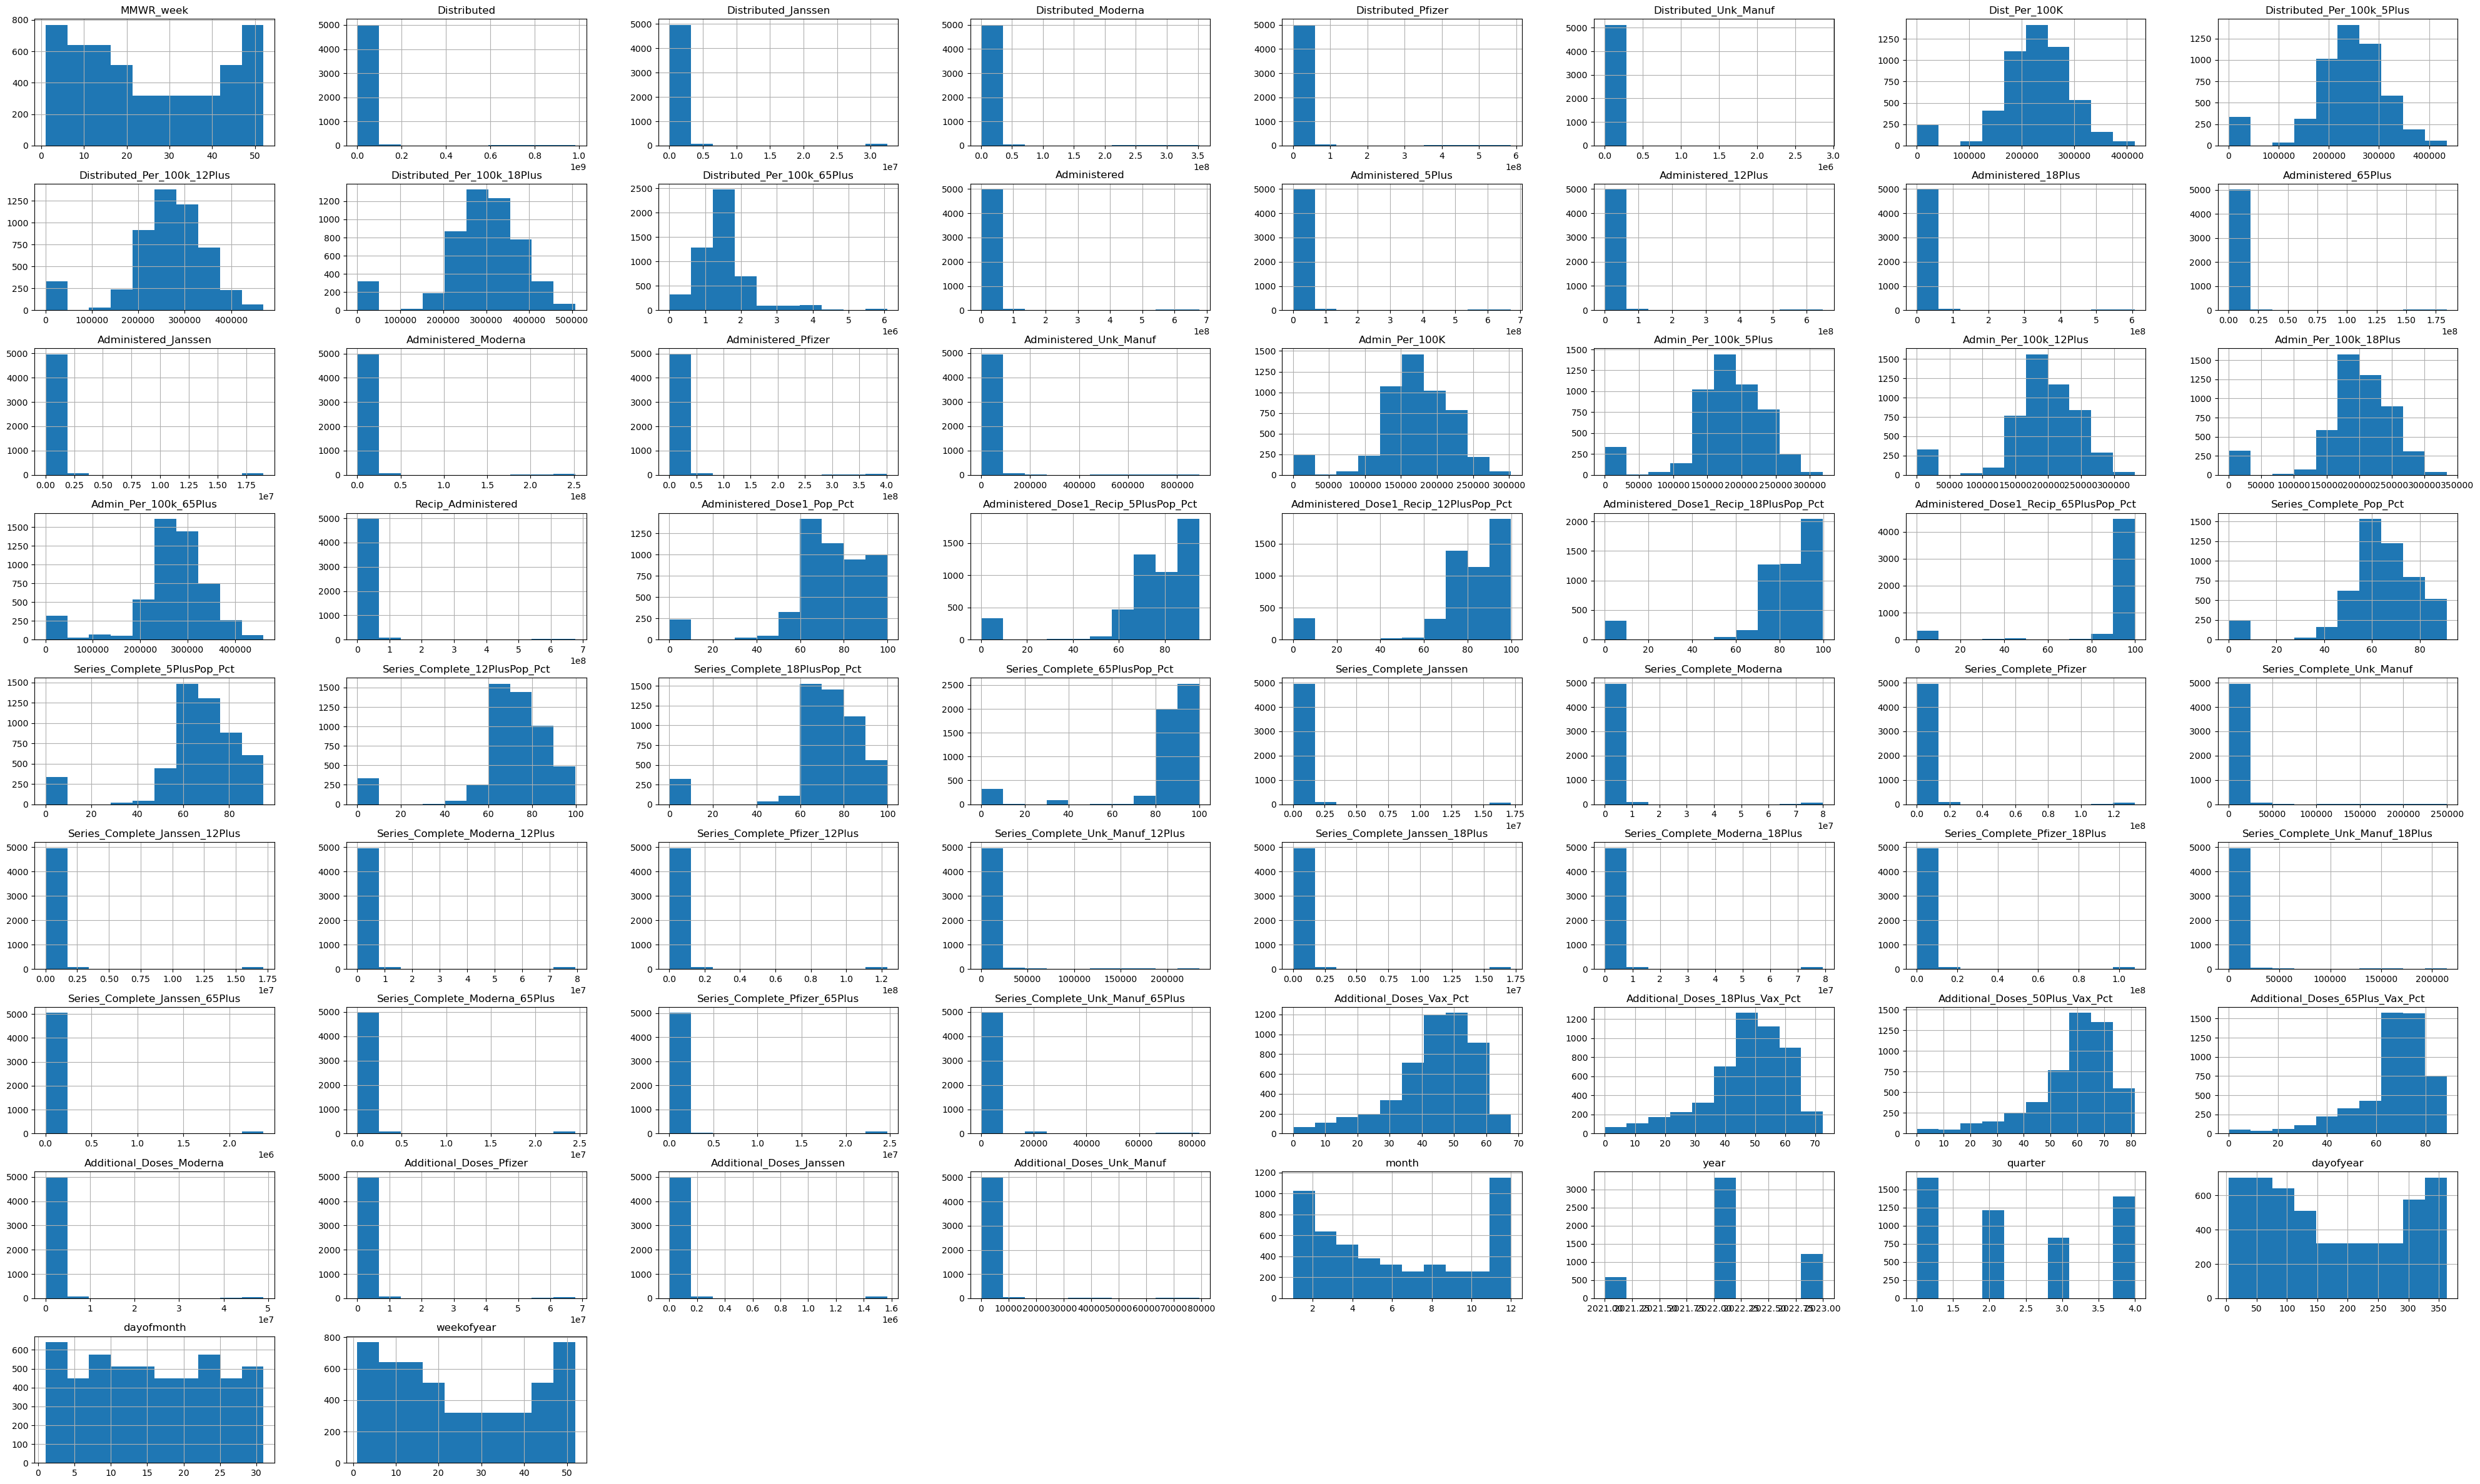

In [43]:
# Distribution of features after data cleaning and imputation

# find continous/ numerical variables
continuous_vars = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# plot d
%matplotlib inline
df.hist (column= continuous_vars,figsize= (50,30))
#hides array names that are otherwise printed
_ = plt.plot()

In [44]:
#...Distribution of categorical variables...#

In [45]:
non_numerical_col = [x for x in df.columns if x not in continuous_vars]
print(non_numerical_col)

['Date', 'Location', 'day_of_week', 'season', 'holidays', 'holiday_season', 'vax_announcement']


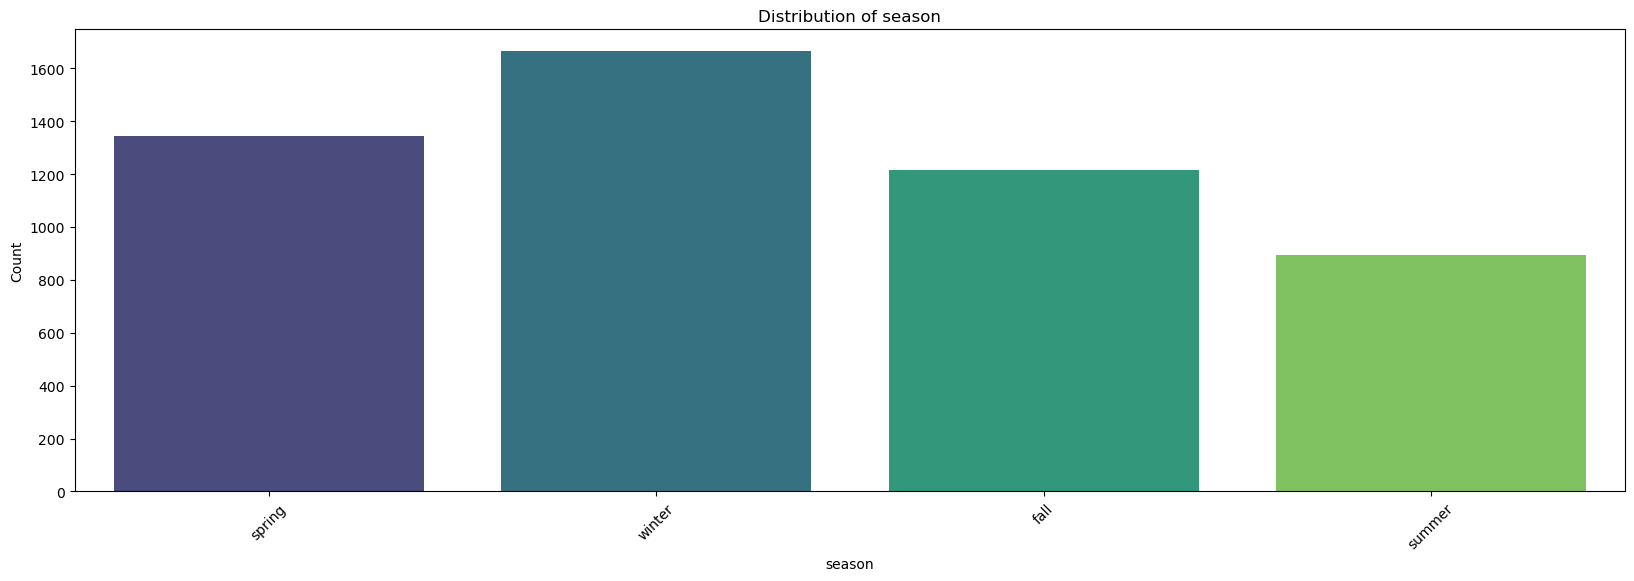

In [46]:
# Distribution of season 
categorical_variable = 'season'

# Create a countplot
plt.figure(figsize=(20, 6))  
sns.countplot(data=df, x=categorical_variable, palette='viridis')  
plt.title(f'Distribution of {categorical_variable}')
plt.xlabel(categorical_variable)
plt.ylabel('Count')

# Rotate x-axis labels for better readability 
plt.xticks(rotation=45)

# Show the plot
plt.show()

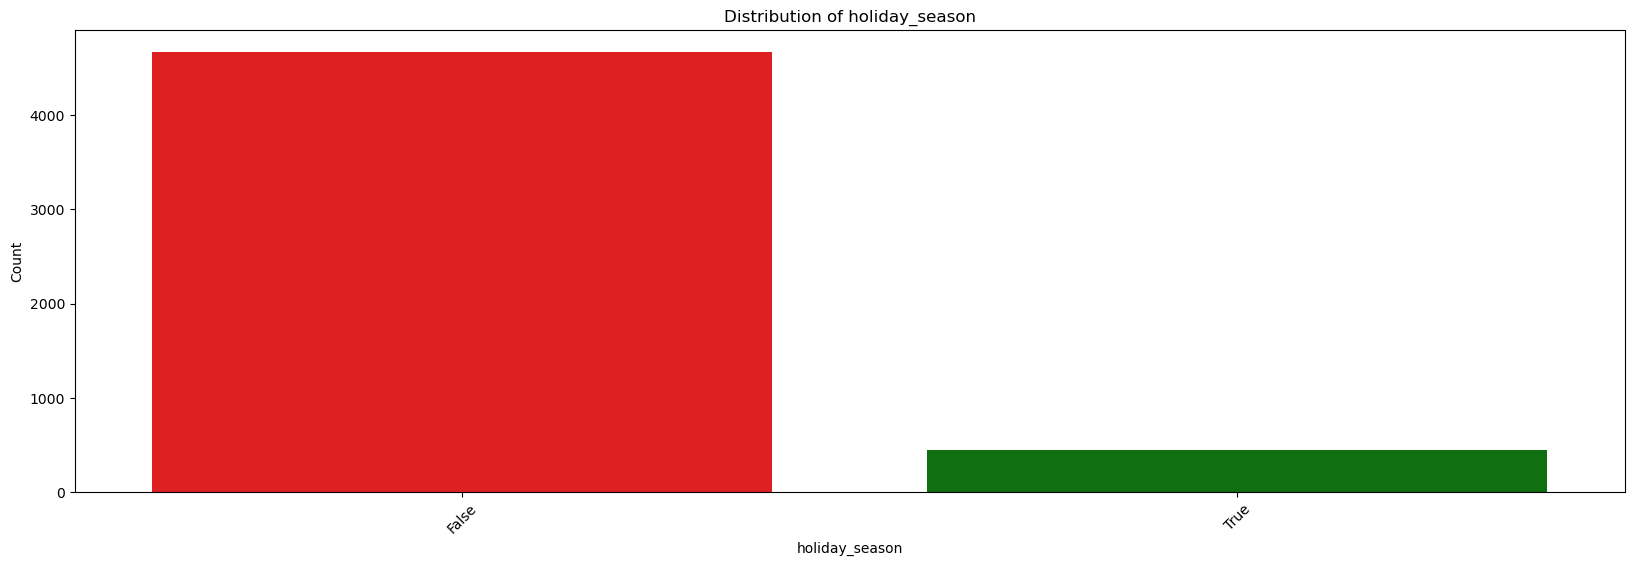

In [47]:
# Custom Boolean color palette
boolean_palette = {True: 'green', False: 'red'}

# Distribution of holidays
categorical_variable = 'holiday_season'

# Create a countplot
plt.figure(figsize=(20, 6))  
sns.countplot(data=df, x=categorical_variable, palette=boolean_palette) 
plt.title(f'Distribution of {categorical_variable}')
plt.xlabel(categorical_variable)
plt.ylabel('Count')

# Rotate x-axis labels for better readability 
plt.xticks(rotation=45)

# Show the plot
plt.show()

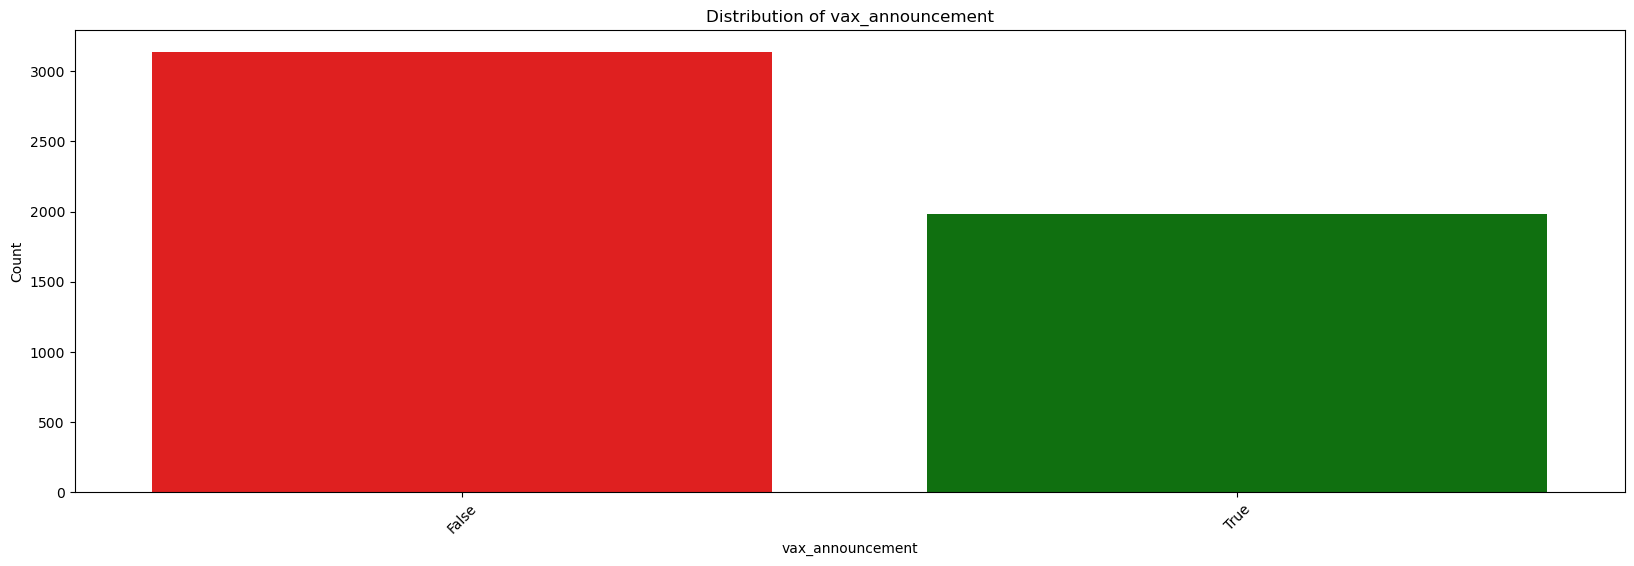

In [48]:
# Distribution of doses near vaccine announcements
categorical_variable = 'vax_announcement'

# Create a countplot
plt.figure(figsize=(20, 6))  # Set the figure size
sns.countplot(data=df, x=categorical_variable, palette=boolean_palette)  
plt.title(f'Distribution of {categorical_variable}')
plt.xlabel(categorical_variable)
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

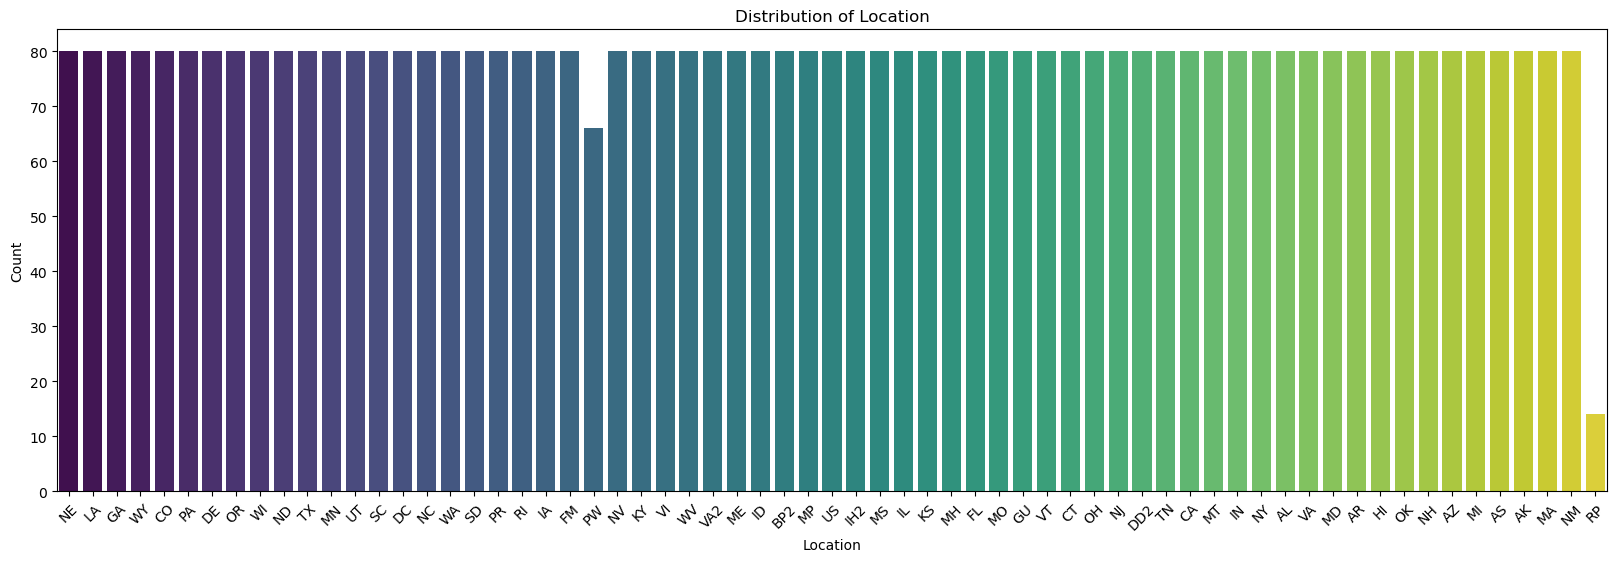

In [49]:
# Distribution of Location
categorical_variable = 'Location'

# Create a countplot
plt.figure(figsize=(20, 6))  
sns.countplot(data=df, x=categorical_variable, palette='viridis')  
plt.title(f'Distribution of {categorical_variable}')
plt.xlabel(categorical_variable)
plt.ylabel('Count')

# Rotate x-axis labels for better readability 
plt.xticks(rotation=45)

# Show the plot
plt.show()

### Outlier Detection
#### Segmented Analysis Outlier Detection

For outlier detection, we used the average for each feature across observations for each date so that we could make the date the index. We decided to use segmented analysis for outlier detection which breaks the dataset into monthly segments and calculates the IQR for each segment. This can help identify if outliers are specific to certain months because the rate of vaccination varies greatly month-to-month. Using this technique, we did not identify any outliers in our dataset.

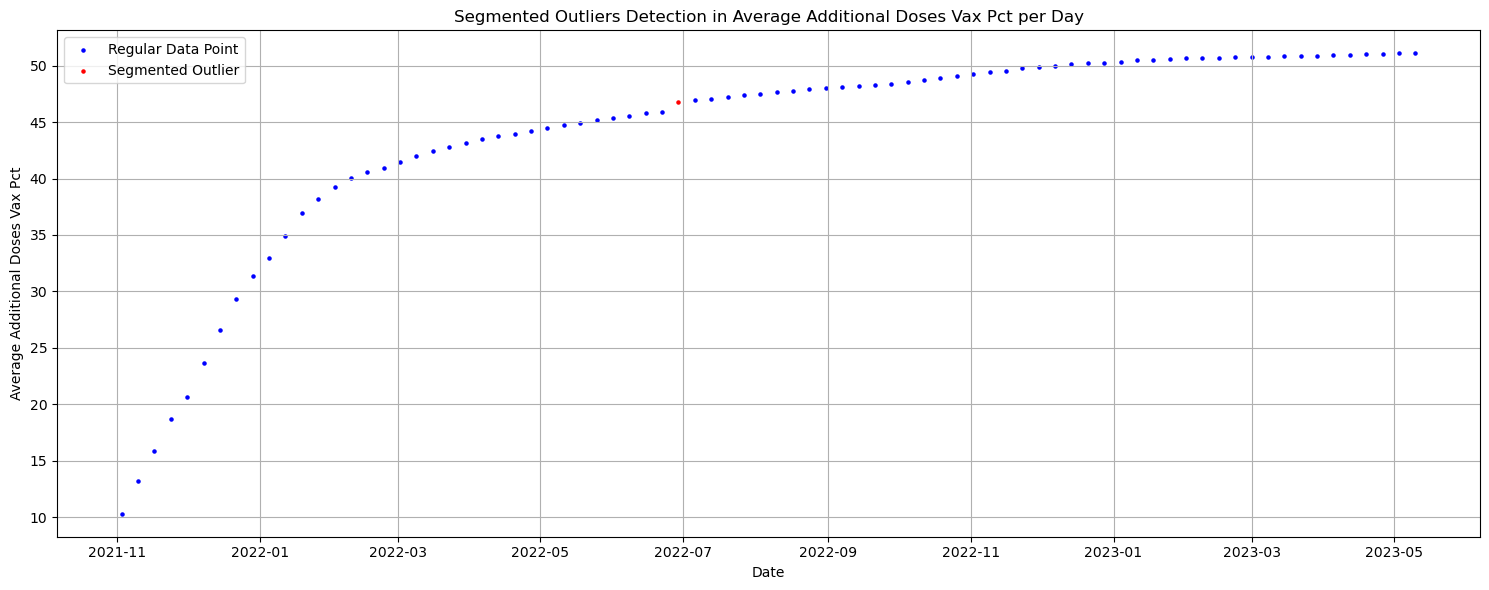

In [50]:
# Box plot to detect outliers
sns.boxplot(x=df[pred_var])
plt.title('Boxplot for Outliers Detection')
plt.show()

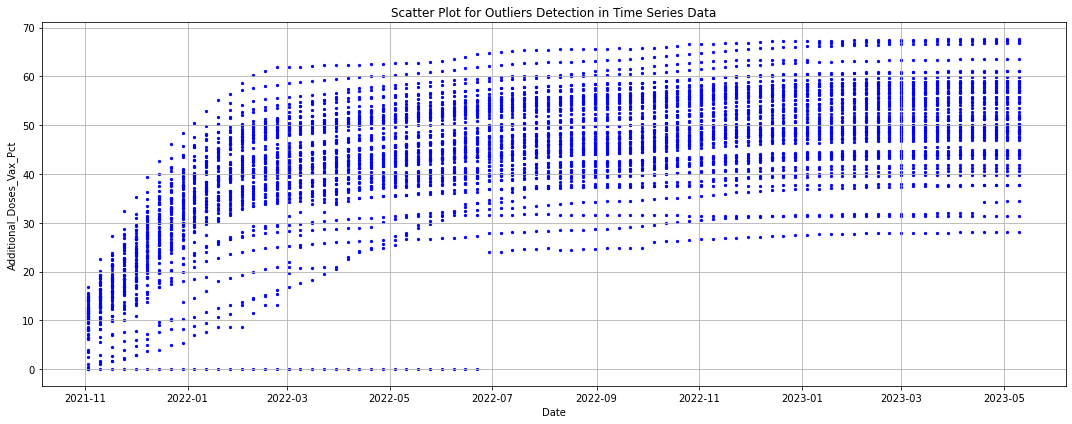

In [51]:
# Scatterplot to determine outliers using the non-unique Dates

plt.figure(figsize=(15, 6))
plt.scatter(df['Date'], df[pred_var], color='blue', s=5)
plt.title('Scatter Plot for Outliers Detection in Time Series Data')
plt.xlabel('Date')
plt.ylabel(pred_var)
plt.grid(True)
plt.tight_layout()
plt.show()

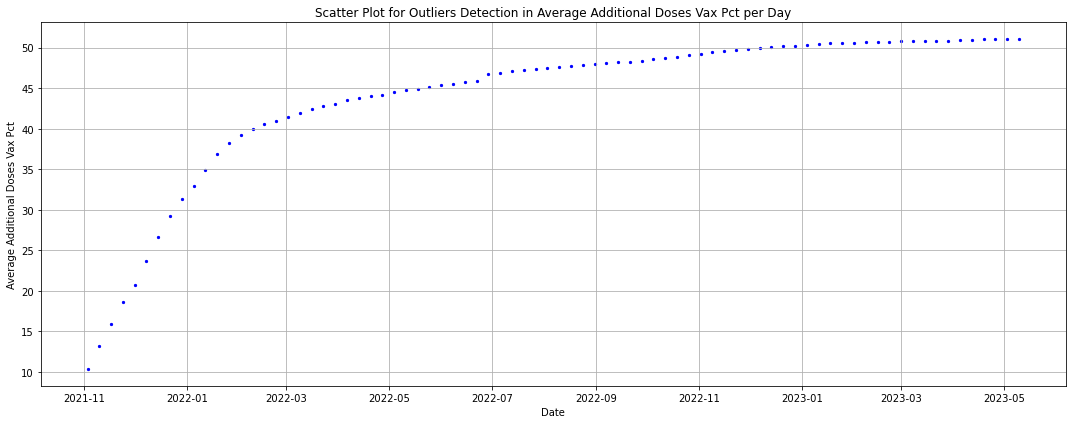

In [52]:
# Scatterplot to determine outliers using mean of all state's response variable on certain Date

# Group by Date and calculate the mean for Additional_Doses_Vax_Pct
avg_vax_pct_per_day = df.groupby('Date')['Additional_Doses_Vax_Pct'].mean().reset_index()

# Scatter plot
plt.figure(figsize=(15, 6))
plt.scatter(avg_vax_pct_per_day['Date'], avg_vax_pct_per_day['Additional_Doses_Vax_Pct'], color='blue', s=5)
plt.title('Scatter Plot for Outliers Detection in Average Additional Doses Vax Pct per Day')
plt.xlabel('Date')
plt.ylabel('Average Additional Doses Vax Pct')
plt.grid(True)
plt.tight_layout()
plt.show()


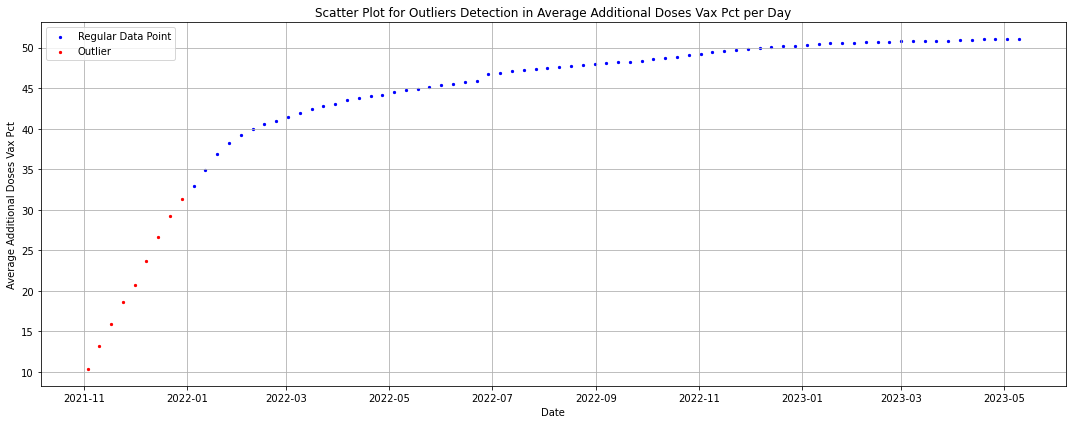

In [53]:
# Scatterplot of averaged response variable with outliers as determined by IQR in red

# Group by Date and calculate the mean for Additional_Doses_Vax_Pct
avg_vax_pct_per_day = df.groupby('Date')['Additional_Doses_Vax_Pct'].mean().reset_index()

# Calculate IQR for the Additional_Doses_Vax_Pct values
Q1 = avg_vax_pct_per_day['Additional_Doses_Vax_Pct'].quantile(0.25)
Q3 = avg_vax_pct_per_day['Additional_Doses_Vax_Pct'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Identify outliers
avg_vax_pct_per_day['is_outlier'] = (avg_vax_pct_per_day['Additional_Doses_Vax_Pct'] < lower_bound) | (avg_vax_pct_per_day['Additional_Doses_Vax_Pct'] > upper_bound)

# Scatter plot
plt.figure(figsize=(15, 6))

# Plot non-outliers in blue and outliers in red
plt.scatter(avg_vax_pct_per_day[avg_vax_pct_per_day['is_segmented_outlier'] == False]['Date'], 
            avg_vax_pct_per_day[avg_vax_pct_per_day['is_segmented_outlier'] == False]['Additional_Doses_Vax_Pct'], 
            color='blue', s=5, label='Regular Data Point')

plt.scatter(avg_vax_pct_per_day[avg_vax_pct_per_day['is_segmented_outlier'] == True]['Date'], 
            avg_vax_pct_per_day[avg_vax_pct_per_day['is_segmented_outlier'] == True]['Additional_Doses_Vax_Pct'], 
            color='red', s=5, label='Segmented Outlier')

plt.title('Segmented Outliers Detection in Average Additional Doses Vax Pct per Day')
plt.xlabel('Date')
plt.ylabel('Average Additional Doses Vax Pct')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Segmented outlier analysis for all of the data

Using this method, there are some outliers in the dataset towards the beginning.

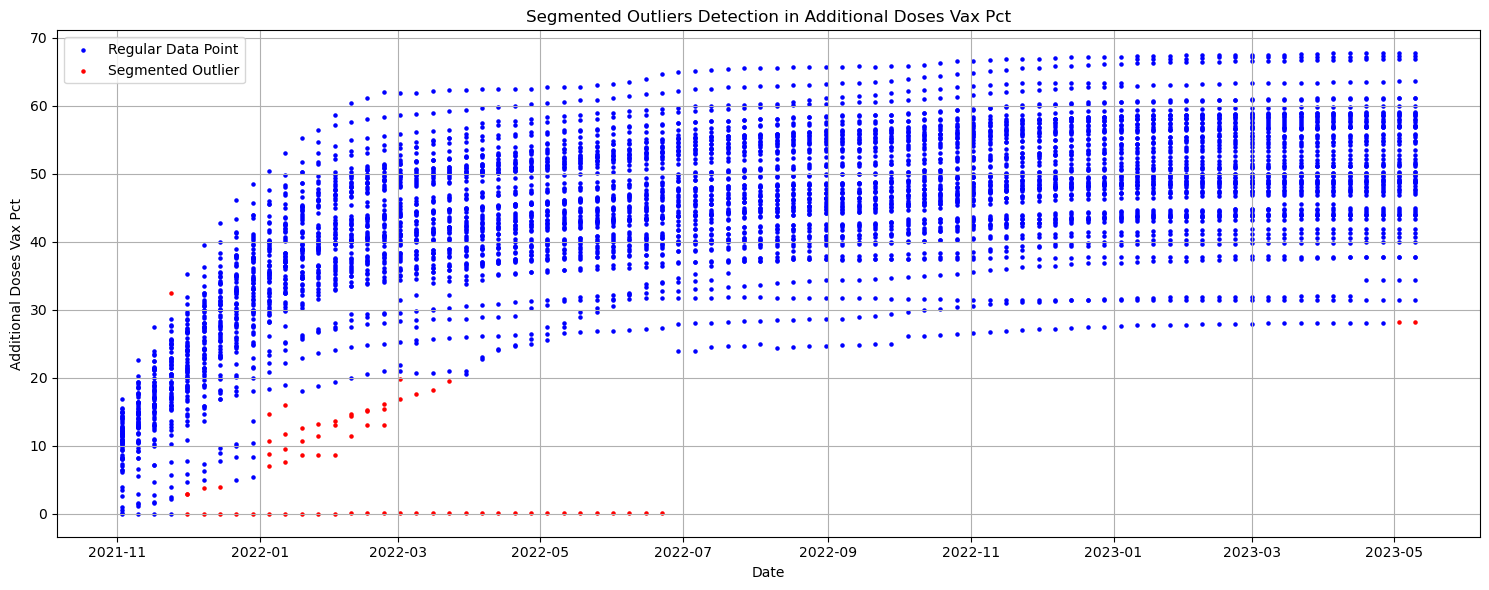

In [59]:
# Split the dataframe based on month
dff = df
dff['YearMonth'] = dff['Date'].dt.to_period('M')
segments = dff.groupby('YearMonth')

# Placeholder for outlier identification
dff['is_segmented_outlier'] = False

# For each segment, determine the outliers using the IQR method
for _, segment in segments:
    Q1 = segment['Additional_Doses_Vax_Pct'].quantile(0.25)
    Q3 = segment['Additional_Doses_Vax_Pct'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    # Mark outliers in the original dataframe
    dff.loc[segment.index, 'is_segmented_outlier'] = (segment['Additional_Doses_Vax_Pct'] < lower_bound) | (segment['Additional_Doses_Vax_Pct'] > upper_bound)

# Scatter plot
plt.figure(figsize=(15, 6))

# Plot non-outliers in blue and outliers in red
plt.scatter(dff[dff['is_segmented_outlier'] == False]['Date'], 
            dff[dff['is_segmented_outlier'] == False]['Additional_Doses_Vax_Pct'], 
            color='blue', s=5, label='Regular Data Point')

plt.scatter(dff[dff['is_segmented_outlier'] == True]['Date'], 
            dff[dff['is_segmented_outlier'] == True]['Additional_Doses_Vax_Pct'], 
            color='red', s=5, label='Segmented Outlier')

plt.title('Segmented Outliers Detection in Additional Doses Vax Pct')
plt.xlabel('Date')
plt.ylabel('Additional Doses Vax Pct')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Correlation

In [54]:
# find correlation of variables with pred variable
correlations = df.corrwith(df.Additional_Doses_Vax_Pct)
high_corr = correlations[abs(correlations) > 0.5]
high_corr

Dist_Per_100K                      0.661938
Distributed_Per_100k_5Plus         0.646820
Distributed_Per_100k_12Plus        0.644318
Distributed_Per_100k_18Plus        0.643156
Admin_Per_100K                     0.672888
Admin_Per_100k_5Plus               0.652247
Admin_Per_100k_12Plus              0.635262
Admin_Per_100k_18Plus              0.635331
Admin_Per_100k_65Plus              0.629980
Series_Complete_Pop_Pct            0.550230
Series_Complete_5PlusPop_Pct       0.531404
Additional_Doses_Vax_Pct           1.000000
Additional_Doses_18Plus_Vax_Pct    0.992497
Additional_Doses_50Plus_Vax_Pct    0.979759
Additional_Doses_65Plus_Vax_Pct    0.950482
year                               0.566563
dtype: float64

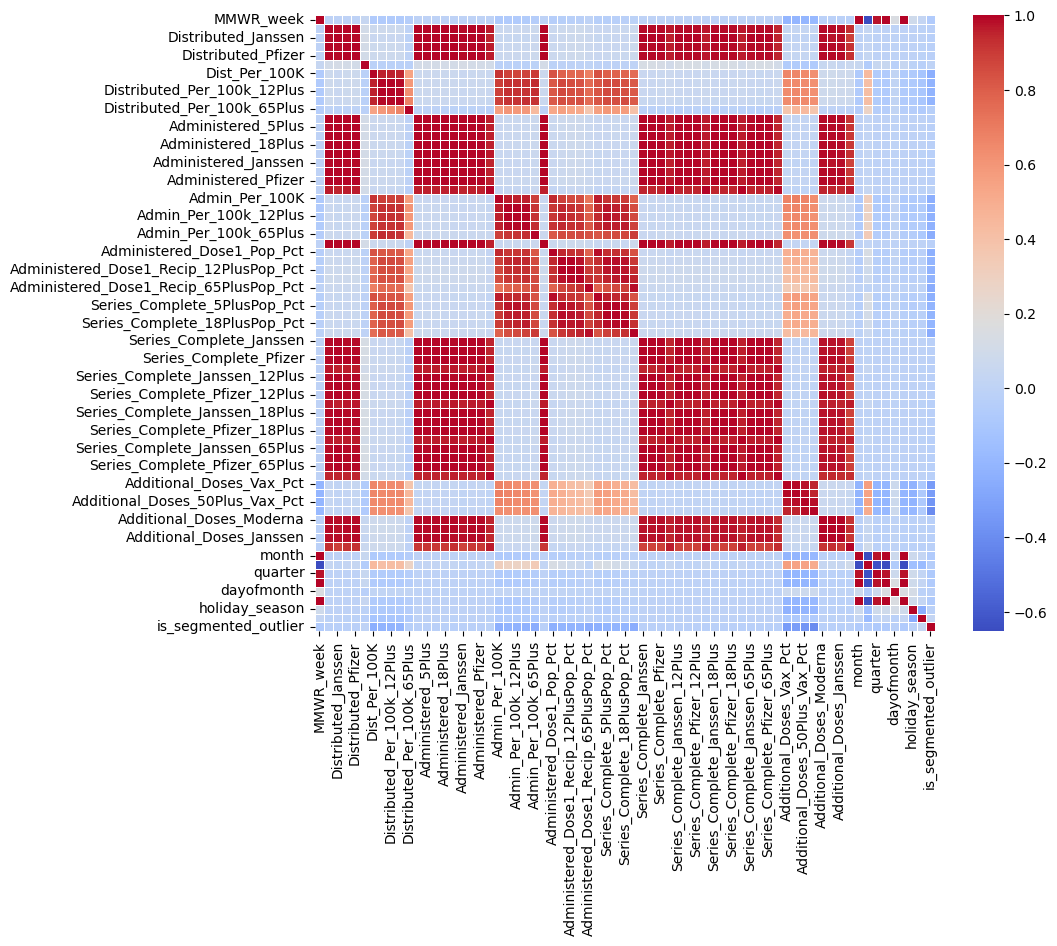

In [55]:
# heat map to show correlation between variables

plt.figure(figsize=(10, 8))  
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)

plt.show()

### Time Series Decomposition

In [56]:
# group data by date as there are multiple entires per each date
time_series_data = df.groupby('Date')[pred_var].mean().reset_index()

In [57]:
time_series_data.head()

,Date,Additional_Doses_Vax_Pct
0,2021-11-03,10.332812
1,2021-11-10,13.185937
2,2021-11-17,15.871875
3,2021-11-24,18.675000
4,2021-12-01,20.689062


In [58]:
# set index to date
time_series_data = time_series_data.set_index('Date')

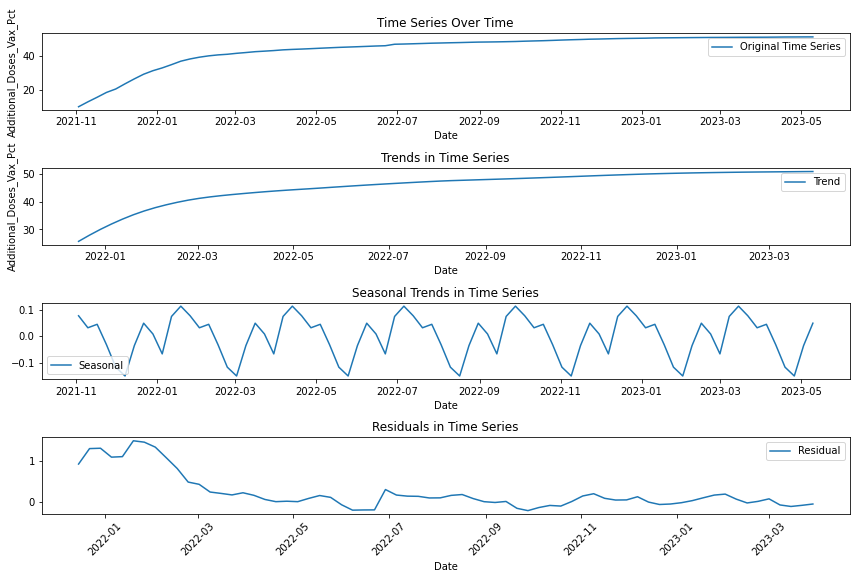

In [61]:
# STL decomposition to investigate trends, seasons and residual

# Perform STL decomposition with seasonality period (12 as it is monthly data)
result = sm.tsa.seasonal_decompose(time_series_data[pred_var], model='stl', period=12)

# Access the decomposed components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot the original time series, trend, seasonal, and residual components
plt.figure(figsize=(12, 8))

# Plot a subset of data 
plt.subplot(4, 1, 1)
plt.plot(time_series_data[pred_var], label='Original Time Series')
plt.legend()
plt.title('Time Series Over Time')
plt.xlabel('Date')
plt.ylabel(pred_var)

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()
plt.title('Trends in Time Series')
plt.xlabel('Date')
plt.ylabel(pred_var)



plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()
plt.title('Seasonal Trends in Time Series')
plt.xlabel('Date')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.legend()
plt.title('Residuals in Time Series')
plt.xlabel('Date')

# Customize x-axis labels to rotate by 45 degrees
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Stationary Data

In [66]:
X = time_series_data.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.009253
p-value: 0.001363
Critical Values:
	1%: -3.518
	5%: -2.900
	10%: -2.587


Our $p-value \le 0.05$: Reject the null hypothesis ($H_0$), the data does not have a unit root and is stationary.

### Autocorrelation

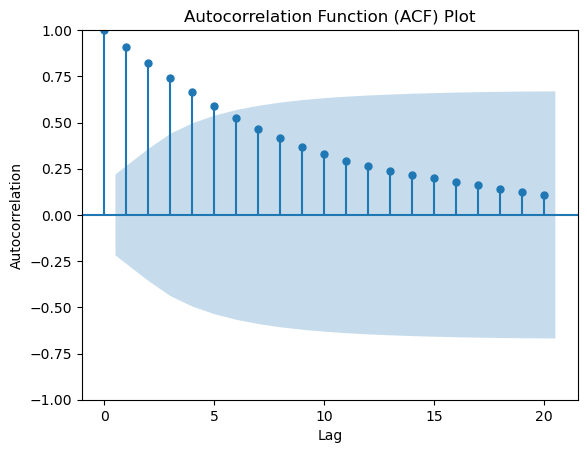

In [67]:
# ACF plot

# Create the ACF plot
plot_acf(time_series_data[pred_var])

# Customize the plot (optional)
plt.title('Autocorrelation Function (ACF) Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

# Show the plot
plt.show()

 This ACF pattern is commonly observed in time series data with a strong short-term memory or persistence. It may imply that the most recent values have a more pronounced impact on the current value, and the impact of earlier values diminishes gradually. The decay in autocorrelation suggests a relatively fast decrease in correlation with increasing time lags.

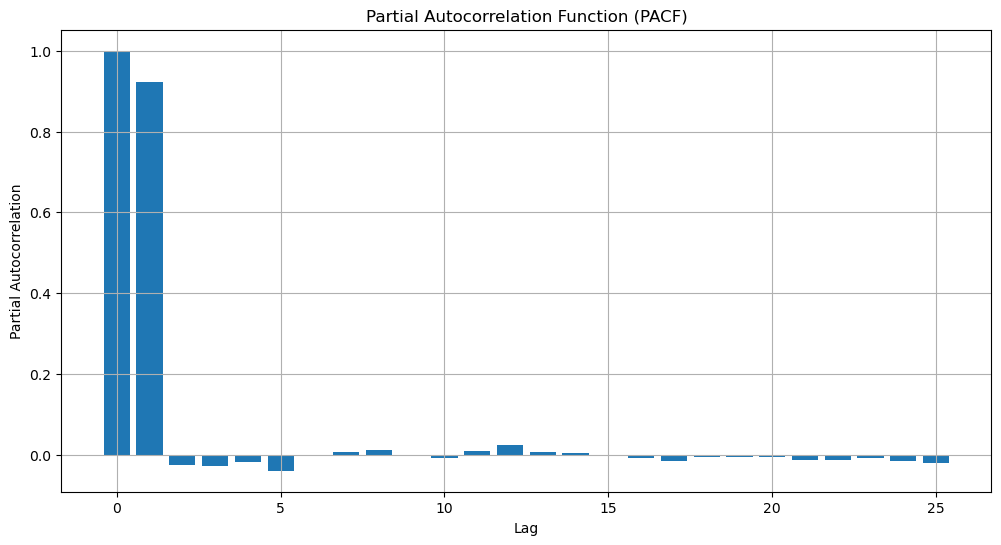

In [68]:
# PACF Plot

# Calculate the PACF
pacf = sm.tsa.pacf(time_series_data, nlags=25)

# Create the PACF plot
plt.figure(figsize=(12, 6))
plt.bar(range(len(pacf)), pacf)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.grid(True)
plt.show()

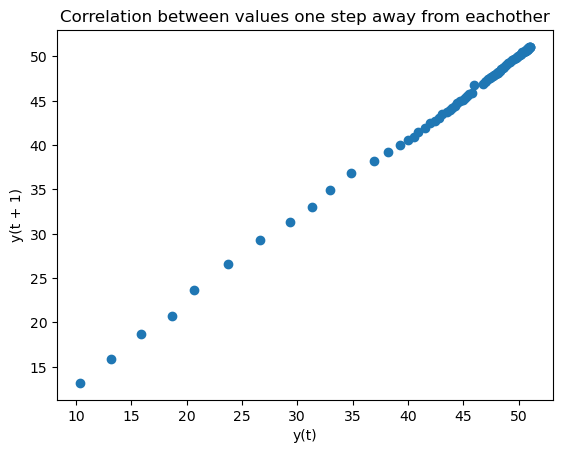

In [69]:
# correlation between current value and the near values of pred variable

lag_plot(time_series_data)
plt.title('Correlation between values one step away from eachother')
plt.show()

In [70]:
# correlation between near values (shift 1)
values = pd.DataFrame(time_series_data)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.999578
t+1  0.999578  1.000000


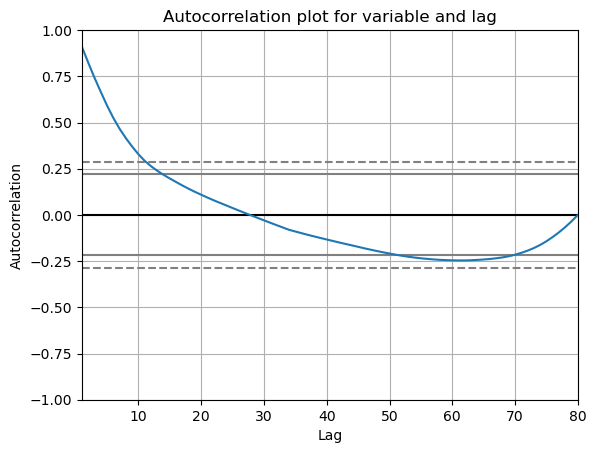

In [71]:
# Autocorrelation plot for variable and lag
autocorrelation_plot(time_series_data)
plt.title('Autocorrelation plot for variable and lag')
plt.show()

### Adding lags features and rolling window statistics

In [72]:
df['Additional_Doses_Vax_Pct_1_hr_lag'] = df['Additional_Doses_Vax_Pct'].shift(1)

df['Additional_Doses_Vax_Pct_1_hr_mean'] = df['Additional_Doses_Vax_Pct'].rolling(window = 1).mean()

df['Additional_Doses_Vax_Pct_1_hr_std'] = df['Additional_Doses_Vax_Pct'].rolling(window = 1).std()

df['Additional_Doses_Vax_Pct_1_hr_max'] = df['Additional_Doses_Vax_Pct'].rolling(window = 1).max()

df['Additional_Doses_Vax_Pct_1_hr_min'] = df['Additional_Doses_Vax_Pct'].rolling(window = 1).min()


### Multivariate Analysis and further analysis of Date derived variables

In [73]:
features_target = df[['day_of_week',
       'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear', 
                      'season', 'holidays', 'holiday_season', 'vax_announcement',
       'Additional_Doses_Vax_Pct_1_hr_lag',
       'Additional_Doses_Vax_Pct_1_hr_mean',
       'Additional_Doses_Vax_Pct_1_hr_std',
       'Additional_Doses_Vax_Pct_1_hr_max',
       'Additional_Doses_Vax_Pct_1_hr_min', pred_var,'Date']]
features_target = features_target.set_index('Date')

<Axes: >

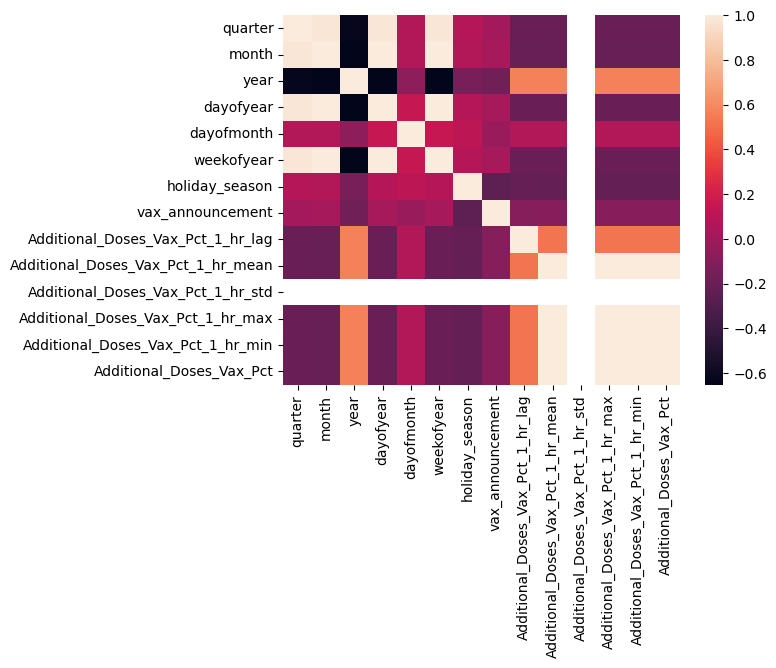

In [74]:
correlation = features_target.corr( method='pearson' )
sns.heatmap( correlation )

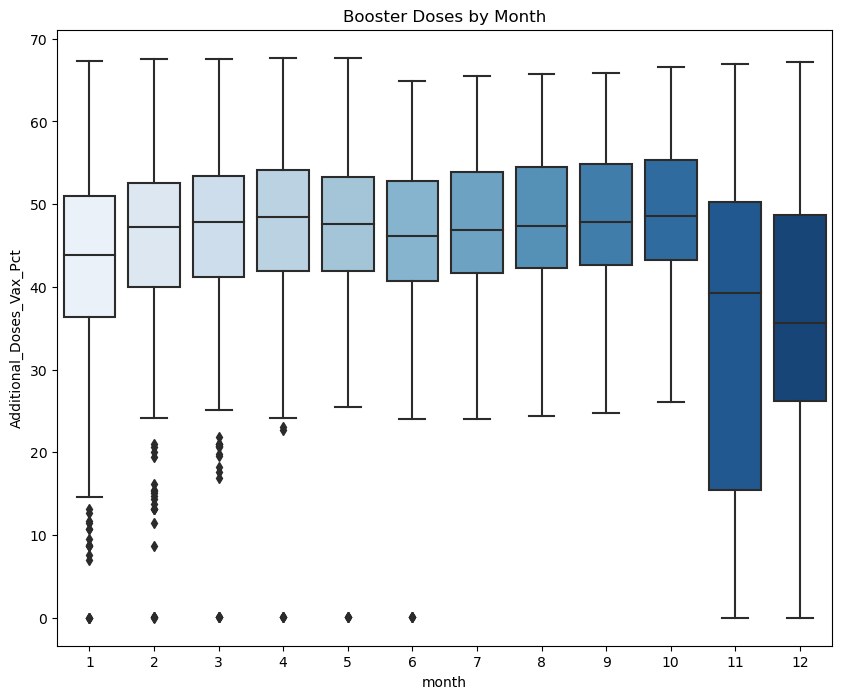

In [75]:
# visualize the monthly pred_var
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=features_target, x='month', y=pred_var, palette='Blues')
ax.set_title('Booster Doses by Month')
plt.show()


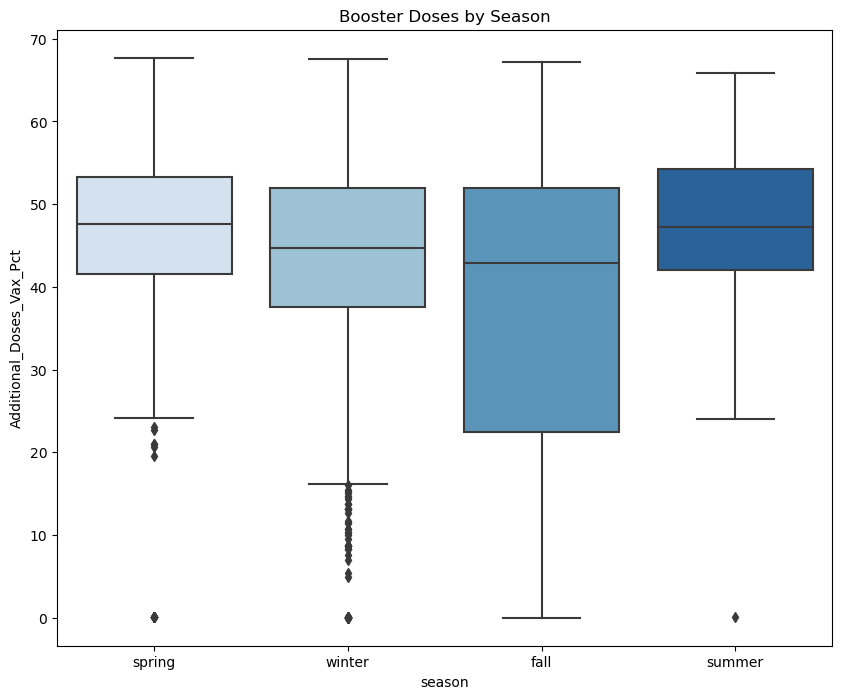

In [76]:
# visualize the seasonal pred_var
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=features_target, x='season', y=pred_var, palette='Blues')
ax.set_title('Booster Doses by Season')
plt.show()